## Business Case: Delhivery - Feature Engineering 
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
## Problem Statement definition: 
The company wants to understand and process the data coming out of data engineering pipelines:
• Clean, sanitize and manipulate data to get useful features out of raw fields
• Make sense out of the raw data and help the data science team to build forecasting models on it

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
    * FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    * Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import  scipy.stats as spy
from  scipy.stats import ttest_ind,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler

In [107]:
delhivery_df = pd.read_csv("delhivery_data.csv")

print('Shape of the data set is as follows: ')
print('No. of Rows: '+ str(delhivery_df.shape[0]))
print('No. of Columns: '+ str(delhivery_df.shape[1]))
print('-------------------------------------------')

Shape of the data set is as follows: 
No. of Rows: 144867
No. of Columns: 24
-------------------------------------------


In [108]:
delhivery_df.describe().T  

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [109]:
print("Number of unique values for each column ")
print("------------------------------------------")
for column in list(delhivery_df.columns):
    print(column+ " :  "+ str(delhivery_df[''+column+''].value_counts().index.nunique()) )

Number of unique values for each column 
------------------------------------------
data :  2
trip_creation_time :  14817
route_schedule_uuid :  1504
route_type :  2
trip_uuid :  14817
source_center :  1508
source_name :  1498
destination_center :  1481
destination_name :  1468
od_start_time :  26369
od_end_time :  26369
start_scan_to_end_scan :  1915
is_cutoff :  2
cutoff_factor :  501
cutoff_timestamp :  93180
actual_distance_to_destination :  144515
actual_time :  3182
osrm_time :  1531
osrm_distance :  138046
factor :  45641
segment_actual_time :  747
segment_osrm_time :  214
segment_osrm_distance :  113799
segment_factor :  5675


In [110]:
#Values of attributes having 5 or less categories based on the above unique value counts

print("data unique values : ")
print(delhivery_df['data'].value_counts().index.to_list())
print("-------------------------")

print("route_type unique values ")
print(delhivery_df['route_type'].value_counts().index.to_list())
print("-------------------------")


print("Cutoff unique values ")
print(delhivery_df['is_cutoff'].value_counts().index.to_list())
print("-------------------------")



data unique values : 
['training', 'test']
-------------------------
route_type unique values 
['FTL', 'Carting']
-------------------------
Cutoff unique values 
[True, False]
-------------------------


In [111]:
delhivery_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### Converting date time columns into datetime64

In [112]:

datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    delhivery_df[i] = pd.to_datetime(delhivery_df[i])

#delhivery_df.info()
null_value_count = delhivery_df.isna().sum().to_dict()
print("Columns having null values: ")
print("----------------------------")
for k in null_value_count.keys():
    if null_value_count[k] != 0:
        print(k)

Columns having null values: 
----------------------------
source_name
destination_name


## As we see "source_name" and "destination_name" have null values
* We need to Replace source names with a placeholder location value for each of the source_centers having null source_names
* For destination name, 
    *  Find the placeholder we already assigned to source_center having null source_name and assign the same to destination_name as well (to prevent    duplicate destination_names for the same destination_center )
    * Replace destination names with a placeholder location value for each of the destination_centers having null destination_name

### Source name population with placeholders

In [113]:
import numpy as np
null_source_names = delhivery_df[delhivery_df["source_name"].isna() == True]["source_center"].unique().tolist()

print("Source center having null source names: ")
print(null_source_names)
num = 0 
for sc in null_source_names:
    #print(sc)
    delhivery_df.loc[delhivery_df["source_center"]== sc, "source_name" ] = f"location_{num}"
    num+=1

print("-------------------")
print("Replacing source names with a placeholder location value for each of the source_centers having null source_names")
for i in null_source_names:
    sc_name = delhivery_df[(delhivery_df["source_center"]== i) ]["source_name"].unique()
    print(f"Source_name: {sc_name} and source_center : {i}")
print(f"location_num_max : {num}")
location_num_max = num
# ["source_name","source_center"]

Source center having null source names: 
['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B', 'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B', 'IND505326AAB', 'IND852118A1B']
-------------------
Replacing source names with a placeholder location value for each of the source_centers having null source_names
Source_name: ['location_0'] and source_center : IND342902A1B
Source_name: ['location_1'] and source_center : IND577116AAA
Source_name: ['location_2'] and source_center : IND282002AAD
Source_name: ['location_3'] and source_center : IND465333A1B
Source_name: ['location_4'] and source_center : IND841301AAC
Source_name: ['location_5'] and source_center : IND509103AAC
Source_name: ['location_6'] and source_center : IND126116AAA
Source_name: ['location_7'] and source_center : IND331022A1B
Source_name: ['location_8'] and source_center : IND505326AAB
Source_name: ['location_9'] and source_center : IND852118A1B
location_num_max : 10


### Destination name population and lookup to avoid duplicate population of destination names from source names  

In [114]:
import numpy as np
null_destination_names = delhivery_df[delhivery_df["destination_name"].isna() == True]["destination_center"].unique().tolist()


print("Destination having null destination names: ")
print(null_destination_names)
num = 0 
for dc in null_destination_names:
    #print(sc))
    if dc in delhivery_df[delhivery_df["source_center"]== dc]["source_center"].unique().tolist():
        sc_name = delhivery_df[(delhivery_df["source_center"]== dc) ]["source_name"].unique()
        #print(sc_name)
        delhivery_df.loc[delhivery_df["destination_center"]== dc, "destination_name" ] = sc_name[0]
        print(f"Destination_name: {sc_name[0]} and destination_center : {dc}")
        


null_destination_names_after_source_name_reference = delhivery_df[delhivery_df["destination_name"].isna() == True]["destination_center"].unique().tolist()

print("Destination center having null destination names: ")
print(null_destination_names_after_source_name_reference)
num = 0 
for dc in null_destination_names_after_source_name_reference:
    #print(sc)
    delhivery_df.loc[delhivery_df["destination_center"]== dc, "destination_name" ] = f"location_{location_num_max}"
    location_num_max+=1

print("-------------------")
print("Replacing destination names with a placeholder location value for each of the destination_centers having null destination_names and does not have a prior source name assigned for the same source_center")
for i in null_destination_names_after_source_name_reference:
    dc_name = delhivery_df[(delhivery_df["destination_center"]== i) ]["destination_name"].unique()
    print(f"destination_name: {dc_name} and destination_center : {i}")



Destination having null destination names: 
['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B', 'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA', 'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C', 'IND122015AAC']
Destination_name: location_0 and destination_center : IND342902A1B
Destination_name: location_1 and destination_center : IND577116AAA
Destination_name: location_2 and destination_center : IND282002AAD
Destination_name: location_3 and destination_center : IND465333A1B
Destination_name: location_4 and destination_center : IND841301AAC
Destination_name: location_8 and destination_center : IND505326AAB
Destination_name: location_9 and destination_center : IND852118A1B
Destination_name: location_6 and destination_center : IND126116AAA
Destination_name: location_5 and destination_center : IND509103AAC
Destination center having null destination names: 
['IND221005A1A', 'IND250002AAC', 'IND331001A1C', 'IND122015AAC']
-------------------
Replacin

In [115]:
delhivery_df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

#### Handling of null values done

## Merging and aggregation of necessary fields

We can define each segment as same [trip_id, source_center, destination_center]


Segment related columns as:
* segment_actual_time
* segment_osrm_time
* segment_osrm_distance



Let's create a new id to group them together using a single columns , that indicates:
* trip_id + source_center + destination_center

In [116]:
# Segment defined as trips having same trip_id, source and destination
delhivery_df ["trip_segment_id"]= delhivery_df["trip_uuid"] + delhivery_df["source_center"] +  delhivery_df["destination_center"] 

# We take cum sum for each of the segment and then use the last value to get the total time required to complete that segment in that trip
delhivery_df["segment_actual_time_cum_sum"]= delhivery_df.groupby("trip_segment_id")["segment_actual_time"].cumsum()
delhivery_df["segment_osrm_time_cum_sum"]= delhivery_df.groupby("trip_segment_id")["segment_osrm_time"].cumsum()
delhivery_df["segment_osrm_distance_cum_sum"]= delhivery_df.groupby("trip_segment_id")["segment_osrm_distance"].cumsum()

delhivery_df[["segment_actual_time_cum_sum","segment_osrm_time_cum_sum","segment_osrm_distance_cum_sum"]]


,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [117]:
dh_df_g1 = delhivery_df.groupby("trip_segment_id").agg({
    "data": "first",
    'route_type' : 'first',
    "trip_creation_time": "first",
    "route_schedule_uuid": "first",
    "trip_uuid": "first",

    # We want to preserve the first source info, destination info , start_end details
    "source_name": "first",
    "source_center": "first",
    
    "destination_name":"last",
    "destination_center":"last",
    
    "od_start_time": "first",
    "od_end_time": "first",
    "start_scan_to_end_scan": "first",

    # All cumilative columns we take it's last value 
    "actual_distance_to_destination": "last",
    "actual_time": "last",

    "osrm_time": "last",
    "osrm_distance": "last",

    # Since we have computed cum_sum with each of the newly created segment id
    "segment_actual_time_cum_sum": "last",
    "segment_osrm_time_cum_sum":"last",
    "segment_osrm_distance_cum_sum":"last"
}).reset_index()
dh_df_g1

,trip_segment_id,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND628204AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),IND627657AAA,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),IND628613AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),IND628801AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND628204AAA,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,FTL,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Bellary_Dc (Karnataka),IND583101AAA,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


#### Need to sort the values based on od_end_time to have the end segment in the last

In [118]:
dh_df_g1 = dh_df_g1.sort_values(["od_end_time"], ascending = True).reset_index()

In [119]:
# AS we see the same trip id has multiple rows
dh_df_g1['trip_uuid'].value_counts()

trip_uuid
trip-153758895506669465    8
trip-153710494321650505    8
trip-153717306559016761    8
trip-153714623672113416    7
trip-153791729899000323    7
                          ..
trip-153738470366080670    1
trip-153733633787761724    1
trip-153744075296068034    1
trip-153744415493055568    1
trip-153843695443252828    1
Name: count, Length: 14817, dtype: int64

### Let's pick one from the lot


In [120]:
dh_df_g1[(dh_df_g1['trip_uuid'] == 'trip-153714623672113416')][["source_name","destination_name","od_end_time"]]#.sort_values("od_end_time")



,source_name,destination_name,od_end_time
5944,Pondicherry_Vasanthm_I (Pondicherry),Cuddalore_KtsiGrsm_D (Tamil Nadu),2018-09-17 03:53:19.742146
6038,Cuddalore_KtsiGrsm_D (Tamil Nadu),Chidambaram_ARBNorth_DC (Tamil Nadu),2018-09-17 05:09:49.142238
6125,Chidambaram_ARBNorth_DC (Tamil Nadu),Sirkazhi_Pngktgudi_D (Tamil Nadu),2018-09-17 06:05:55.017799
6219,Sirkazhi_Pngktgudi_D (Tamil Nadu),Karaikal_Thalthru_DC (Pondicherry),2018-09-17 07:08:23.416862
6295,Karaikal_Thalthru_DC (Pondicherry),Nagapttinm_Sttyapar_D (Tamil Nadu),2018-09-17 08:13:38.977726
6355,Nagapttinm_Sttyapar_D (Tamil Nadu),Thiruvarur_Bypasrd_D (Tamil Nadu),2018-09-17 09:18:12.121383
6527,Thiruvarur_Bypasrd_D (Tamil Nadu),Pondicherry_Vasanthm_I (Pondicherry),2018-09-17 13:53:42.601705


* As we see all the data is sorterd with intermediate segment destinations
* "First" Source name and "Last" destination name being same

* we can combine od_start_time and od_end_time into one

In [121]:
dh_df_g1['od_start_time'] = pd.to_datetime(dh_df_g1['od_start_time'])
dh_df_g1['od_end_time'] = pd.to_datetime(dh_df_g1['od_end_time'])
dh_df_g1['od_time_diff_hour'] = (dh_df_g1['od_end_time'] - dh_df_g1['od_start_time']).dt.total_seconds() /(60)
dh_df_g1['od_time_diff_hour']

0          38.500508
1          49.333390
2          68.588279
3          67.043163
4          52.581701
            ...     
26363    3220.926919
26364    4207.224100
26365    4440.938567
26366    1223.352949
26367    7898.551955
Name: od_time_diff_hour, Length: 26368, dtype: float64

In [122]:
dh_df_g1['trip_creation_time'] = pd.to_datetime(dh_df_g1['trip_creation_time'])

dh_df_g1['trip_year'] = dh_df_g1['trip_creation_time'].dt.year
dh_df_g1['trip_month'] = dh_df_g1['trip_creation_time'].dt.month
dh_df_g1['trip_hour'] = dh_df_g1['trip_creation_time'].dt.hour
dh_df_g1['trip_day'] = dh_df_g1['trip_creation_time'].dt.day
dh_df_g1['trip_week'] = dh_df_g1['trip_creation_time'].dt.isocalendar().week
dh_df_g1['trip_dayofweek'] = dh_df_g1['trip_creation_time'].dt.dayofweek

In [123]:
dh_df_g1

,index,trip_segment_id,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,...,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum,od_time_diff_hour,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,19,trip-153671110078355292IND121004AABIND121001AAA,training,Carting,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,trip-153671110078355292,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad (Haryana),...,17.0,9.0,10.8159,38.500508,2018,9,0,12,37,2
1,17,trip-153671079956500691IND110024AAAIND110014AAA,training,Carting,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,trip-153671079956500691,Delhi_Lajpat_IP (Delhi),IND110024AAA,Delhi_Bhogal (Delhi),...,23.0,14.0,16.0860,49.333390,2018,9,0,12,37,2
2,13,trip-153671066826362165IND560043AACIND560064AAA,training,Carting,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,trip-153671066826362165,HBR Layout PC (Karnataka),IND560043AAC,Bengaluru_NwYlhnka_DC (Karnataka),...,25.0,18.0,13.8433,68.588279,2018,9,0,12,37,2
3,33,trip-153671173668736946IND110043AAAIND110078AAA,training,Carting,2018-09-12 00:22:16.687619,thanos::sroute:7734a02c-9376-4767-a1b5-15897a7...,trip-153671173668736946,Delhi_Nangli_IP (Delhi),IND110043AAA,Janakpuri (Delhi),...,43.0,25.0,22.6548,67.043163,2018,9,0,12,37,2
4,58,trip-153671277074687197IND624001AAAIND624619AAA,training,FTL,2018-09-12 00:39:30.747127,thanos::sroute:42969f47-47af-4473-9f2c-cf747fe...,trip-153671277074687197,Dindigul_Central_D_1 (Tamil Nadu),IND624001AAA,Oddnchtram_Palani_D (Tamil Nadu),...,40.0,26.0,27.8572,52.581701,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,25828,trip-153859003271955591IND000000ACBIND562132AAA,test,FTL,2018-10-03 18:07:12.719804,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153859003271955591,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Bangalore_Nelmngla_H (Karnataka),...,2917.0,1860.0,2424.6878,3220.926919,2018,10,18,3,40,2
26364,23673,trip-153840656812932039IND712311AAAIND421302AAG,test,FTL,2018-10-01 15:09:28.129568,thanos::sroute:3592c86e-c3d1-429b-917a-ebe9051...,trip-153840656812932039,Kolkata_Dankuni_HB (West Bengal),IND712311AAA,Bhiwandi_Mankoli_HB (Maharashtra),...,3338.0,1431.0,2068.1202,4207.224100,2018,10,15,1,40,0
26365,25798,trip-153858876340944305IND000000ACBIND562132AAA,test,FTL,2018-10-03 17:46:03.409692,thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...,trip-153858876340944305,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Bangalore_Nelmngla_H (Karnataka),...,4122.0,1706.0,2242.9029,4440.938567,2018,10,17,3,40,2
26366,26265,trip-153860879439383883IND000000ACBIND160002AAC,test,FTL,2018-10-03 23:19:54.394130,thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc94...,trip-153860879439383883,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Chandigarh_Mehmdpur_H (Punjab),...,438.0,232.0,312.8295,1223.352949,2018,10,23,3,40,2


In [124]:
dh_df_g1['od_time_diff_hour'] = (dh_df_g1['od_end_time'] - dh_df_g1['od_start_time']).dt.total_seconds() /(60)
dh_df_g1['od_time_diff_hour']

0          38.500508
1          49.333390
2          68.588279
3          67.043163
4          52.581701
            ...     
26363    3220.926919
26364    4207.224100
26365    4440.938567
26366    1223.352949
26367    7898.551955
Name: od_time_diff_hour, Length: 26368, dtype: float64

In [125]:
dh_df_trip = dh_df_g1.groupby('trip_uuid').agg({
    "data": "first",
    'route_type' : 'first',
    "trip_creation_time": "first",
    "route_schedule_uuid": "first",
    "trip_uuid": "first",

    # We want to preserve the first source info, destination info , start_end details
    "source_name": "first",
    "source_center": "first",
    
    "destination_name":"last",
    "destination_center":"last",
    
    # "od_start_time": "first",
    # "od_end_time": "first",
    "od_time_diff_hour" : "sum",
    "start_scan_to_end_scan": "sum",

    # All cumilative columns we take it's last value 
    "actual_distance_to_destination": "sum",
    "actual_time": "sum",

    "osrm_time": "sum",
    "osrm_distance": "sum",

    # Since we have computed cum_sum with each of the newly created segment id
    "segment_actual_time_cum_sum": "sum",
    "segment_osrm_time_cum_sum":"sum",
    "segment_osrm_distance_cum_sum":"sum"
}).reset_index(drop=True)
dh_df_trip

,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum
0,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,Carting,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,FTL,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,Carting,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,test,Carting,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,test,Carting,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [126]:
dh_df_trip[['actual_time', 'segment_actual_time_cum_sum']]

,actual_time,segment_actual_time_cum_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [127]:
dh_df_trip[['actual_time', 'segment_osrm_time_cum_sum']]

#dh_df_trip[round(dh_df_trip['od_time_diff_hour'],0) == round(dh_df_trip['start_scan_to_end_scan'],0)]

,actual_time,segment_osrm_time_cum_sum
0,1562.0,1008.0
1,143.0,65.0
2,3347.0,1941.0
3,59.0,16.0
4,341.0,115.0
...,...,...
14812,83.0,62.0
14813,21.0,11.0
14814,282.0,88.0
14815,264.0,221.0


In [128]:
dh_df_trip[['od_time_diff_hour', 'start_scan_to_end_scan']]

#dh_df_trip[round(dh_df_trip['od_time_diff_hour'],0) == round(dh_df_trip['start_scan_to_end_scan'],0)]

,od_time_diff_hour,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14812,258.028928,257.0
14813,60.590521,60.0
14814,422.119867,421.0
14815,348.512862,347.0


In [129]:
dh_df_trip

,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum
0,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,Carting,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,FTL,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,Carting,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,test,Carting,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,test,Carting,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [130]:
dh_df_trip['source_name'].str.split("_").apply(lambda x:x[0])

0                          Bhopal
1                          Tumkur
2                       Bangalore
3        Mumbai Hub (Maharashtra)
4                         Bellary
                   ...           
14812                  Chandigarh
14813                         FBD
14814                      Kanpur
14815                 Tirunelveli
14816          Hospet (Karnataka)
Name: source_name, Length: 14817, dtype: object

In [131]:
def city_list_extractor(city_list):
    return city_list[0]
def city_str_extractor(city_str):
    return city_str.split(' ')[0]


In [163]:


dh_df_trip['source_city'] = dh_df_trip['source_name'].str.split("_").apply(lambda x:city_str_extractor(x[0]) if ('('  in x[0])  else city_list_extractor(x))
#dh_df_trip[dh_df_trip['source_city'].apply(lambda x:x if '(' in x else np.nan).isnull() == False]['source_city'].str.split(' ')

dh_df_trip['destination_city'] = dh_df_trip['destination_name'].str.split("_").apply(lambda x:city_str_extractor(x[0]) if ('('  in x[0])  else city_list_extractor(x))
#dh_df_trip[dh_df_trip['source_city'].apply(lambda x:x if '(' in x else np.nan).isnull() == False]['source_city'].str.split(' ')


#dh_df_trip['source_city'] = dh_df_trip['source_city'][dh_df_trip['source_city'].apply(lambda x:x if '(' in x else np.nan).isnull() == False].str.split(' ').apply(lambda x:x[0])
dh_df_trip

,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_time_diff_hour,...,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum,source_city,destination_city,source_state,destination_state
0,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2260.109800,...,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Bhopal,Gurgaon,Madhya Pradesh,Haryana
1,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,181.611874,...,143.0,68.0,85.1110,141.0,65.0,84.1894,Tumkur,Chikblapur,Karnataka,Karnataka
2,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3934.362520,...,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Bangalore,Chandigarh,Karnataka,Punjab
3,training,Carting,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.494935,...,59.0,15.0,19.6800,59.0,16.0,19.8766,Mumbai,Mumbai,Maharashtra,Maharashtra
4,training,FTL,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,718.349042,...,341.0,117.0,146.7918,340.0,115.0,146.7919,Bellary,Bellary,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,Carting,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,...,83.0,62.0,73.4630,82.0,62.0,64.8551,Chandigarh,Chandigarh,Punjab,Punjab
14813,test,Carting,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.590521,...,21.0,12.0,16.0882,21.0,11.0,16.0883,FBD,Faridabad,Haryana,Haryana
14814,test,Carting,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,422.119867,...,282.0,48.0,58.9037,281.0,88.0,104.8866,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh
14815,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,348.512862,...,264.0,179.0,171.1103,258.0,221.0,223.5324,Tirunelveli,Tirunelveli,Tamil Nadu,Tamil Nadu


In [140]:
dh_df_trip

,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_time_diff_hour,...,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum,source_city,destination_city,source_state,destination_state
0,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2260.109800,...,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Bhopal,Gurgaon,Madhya Pradesh,Haryana
1,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,181.611874,...,143.0,68.0,85.1110,141.0,65.0,84.1894,Tumkur,Chikblapur,Karnataka,Karnataka
2,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3934.362520,...,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Bangalore,Chandigarh,Karnataka,Punjab
3,training,Carting,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.494935,...,59.0,15.0,19.6800,59.0,16.0,19.8766,Mumbai,Mumbai,Maharashtra,Maharashtra
4,training,FTL,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,718.349042,...,341.0,117.0,146.7918,340.0,115.0,146.7919,Bellary,Bellary,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,Carting,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,...,83.0,62.0,73.4630,82.0,62.0,64.8551,Chandigarh,Chandigarh,Punjab,Punjab
14813,test,Carting,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.590521,...,21.0,12.0,16.0882,21.0,11.0,16.0883,FBD,Faridabad,Haryana,Haryana
14814,test,Carting,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,422.119867,...,282.0,48.0,58.9037,281.0,88.0,104.8866,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh
14815,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,348.512862,...,264.0,179.0,171.1103,258.0,221.0,223.5324,Tirunelveli,Tirunelveli,Tamil Nadu,Tamil Nadu


In [137]:
import re
dh_df_trip['source_state'] = dh_df_trip['source_name'].apply(lambda x: re.findall(r'\(([^)]+)\)', x)).str[0]
#dh_df_trip['city'] = dh_df_trip['source_name'].apply(lambda x: re.findall(r'\(([^)]+)\)', x)).str[0]
dh_df_trip['destination_state'] = dh_df_trip['destination_name'].apply(lambda x: re.findall(r'\(([^)]+)\)', x)).str[0]
dh_df_trip

,data,route_type,trip_creation_time,route_schedule_uuid,trip_uuid,source_name,source_center,destination_name,destination_center,od_time_diff_hour,...,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum,source_city,destination_city,source_state,destination_state
0,training,FTL,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2260.109800,...,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,Bhopal,Gurgaon,Madhya Pradesh,Haryana
1,training,Carting,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,181.611874,...,143.0,68.0,85.1110,141.0,65.0,84.1894,Tumkur,Chikblapur,Karnataka,Karnataka
2,training,FTL,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3934.362520,...,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,Bangalore,Chandigarh,Karnataka,Punjab
3,training,Carting,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.494935,...,59.0,15.0,19.6800,59.0,16.0,19.8766,Mumbai,Mumbai,Maharashtra,Maharashtra
4,training,FTL,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,718.349042,...,341.0,117.0,146.7918,340.0,115.0,146.7919,Bellary,Bellary,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,Carting,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,...,83.0,62.0,73.4630,82.0,62.0,64.8551,Chandigarh,Chandigarh,Punjab,Punjab
14813,test,Carting,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),IND121004AAB,Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.590521,...,21.0,12.0,16.0882,21.0,11.0,16.0883,FBD,Faridabad,Haryana,Haryana
14814,test,Carting,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,422.119867,...,282.0,48.0,58.9037,281.0,88.0,104.8866,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh
14815,test,Carting,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,348.512862,...,264.0,179.0,171.1103,258.0,221.0,223.5324,Tirunelveli,Tirunelveli,Tamil Nadu,Tamil Nadu


In [138]:
df_source_state = dh_df_trip.groupby('source_state')['trip_uuid'].count().to_frame().reset_index().sort_values('trip_uuid',ascending=False)
df_destination_state =  dh_df_trip.groupby('destination_state')['trip_uuid'].count().to_frame().reset_index().sort_values('trip_uuid',ascending=False)

[]

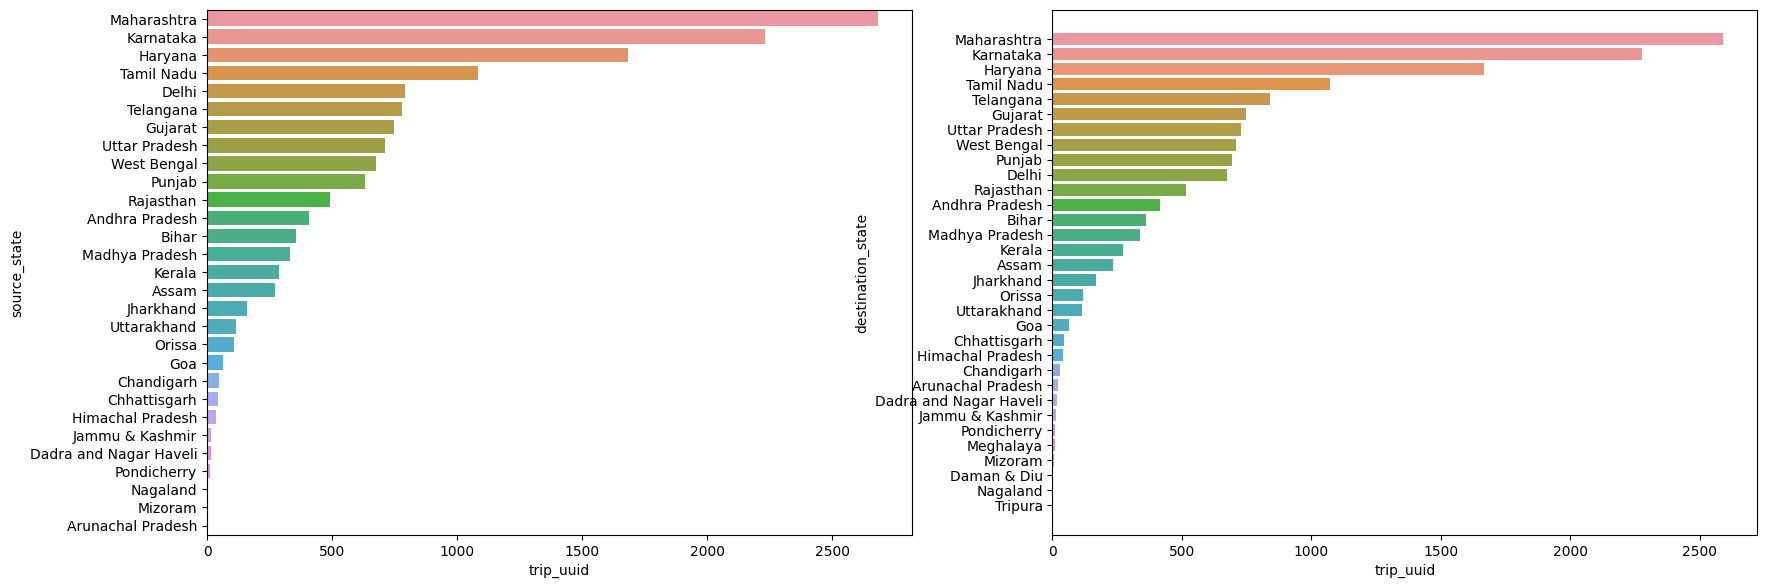

In [139]:
plt.figure(figsize = (20, 15))
plt.subplot(2,2,1)
sns.barplot(data = df_source_state, x= df_source_state['trip_uuid'],y=df_source_state['source_state'])
plt.subplot(2,2,2)
sns.barplot(data = df_destination_state, x= df_destination_state['trip_uuid'],y=df_destination_state['destination_state'])
              
plt.plot()

In [158]:
df_source_city = dh_df_trip.groupby('source_city')['trip_uuid'].count().to_frame().reset_index().sort_values('trip_uuid',ascending=False)[:10]
df_destination_city =  dh_df_trip.groupby('destination_city')['trip_uuid'].count().to_frame().reset_index().sort_values('trip_uuid',ascending=False)[:10]
df_source_city

,source_city,trip_uuid
233,Gurgaon,1024
84,Bengaluru,1015
432,Mumbai,893
104,Bhiwandi,811
61,Bangalore,755
168,Delhi,620
261,Hyderabad,562
512,Pune,445
136,Chandigarh,418
349,Kolkata,339


[]

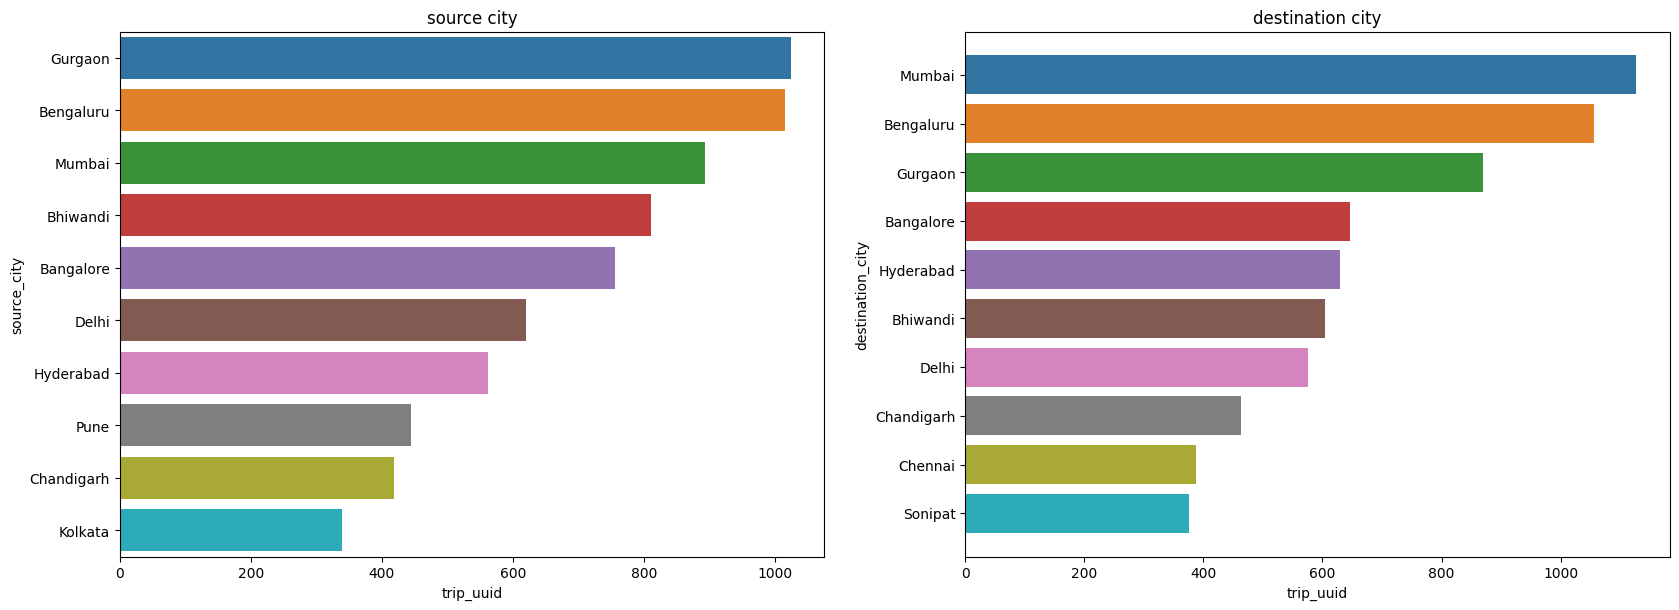

In [160]:
plt.figure(figsize = (20, 15))
plt.subplot(2,2,1)
plt.title("source city")
sns.barplot(data = df_source_city, x= df_source_city['trip_uuid'],y=df_source_city['source_city'])
plt.subplot(2,2,2)
plt.title("destination city")
sns.barplot(data = df_destination_city, x= df_destination_city['trip_uuid'],y=df_destination_city['destination_city'])
              
plt.plot()

* Maximum orders ended up in Mumbai, Bengaluru, Gurgaon, Hyderabad. Most orders being placed from these city

In [38]:
dh_df_trip.columns

Index(['data', 'route_type', 'trip_creation_time', 'route_schedule_uuid',
       'trip_uuid', 'source_name', 'source_center', 'destination_name',
       'destination_center', 'od_time_diff_hour', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_cum_sum',
       'segment_osrm_time_cum_sum', 'segment_osrm_distance_cum_sum',
       'source_city', 'destination_city', 'source_state', 'destination_state'],
      dtype='object')

### To visualize the amount of Route types present in the data

In [39]:
df_routes = dh_df_trip.groupby('route_type')["trip_uuid"].count().to_frame().reset_index()
df_routes

,route_type,trip_uuid
0,Carting,8908
1,FTL,5909


<Axes: xlabel='route_type', ylabel='trip_uuid'>

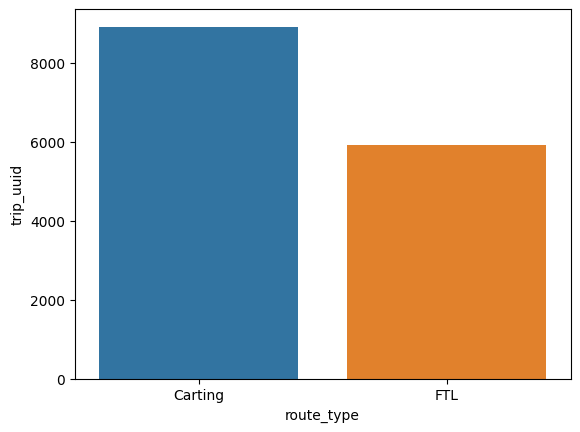

In [40]:

sns.barplot(data=df_routes, x = df_routes["route_type"], y = df_routes["trip_uuid"])

* More Carting route types than FTL

### To visualize the amount of kind of data Test or Train present in the data

In [41]:
df_type = dh_df_trip.groupby('data')["trip_uuid"].count().to_frame().reset_index()
df_type

,data,trip_uuid
0,test,4163
1,training,10654


<Axes: xlabel='data', ylabel='trip_uuid'>

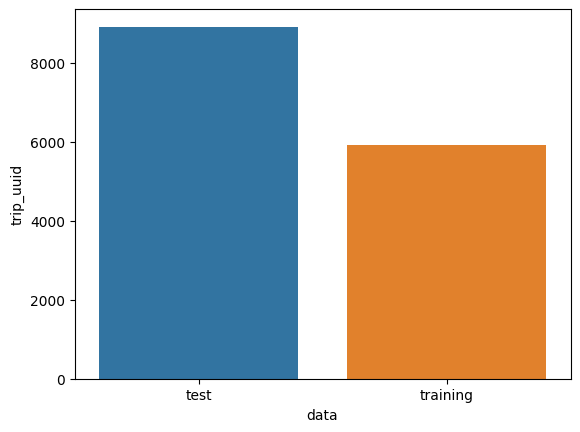

In [43]:

sns.barplot(data=df_routes, x = df_type["data"], y = df_routes["trip_uuid"])

* More training data than test

In [206]:
dh_df_trip['trip_creation_week'] = dh_df_trip['trip_creation_time'].dt.isocalendar().week
dh_df_trip['trip_creation_week'] = dh_df_trip['trip_creation_week'].astype('int8')
dh_df_trip['trip_creation_week'].head()


dh_df_trip['trip_creation_year'] = dh_df_trip['trip_creation_time'].dt.year
dh_df_trip['trip_creation_year'].head()

dh_df_trip['trip_creation_hour'] = dh_df_trip['trip_creation_time'].dt.hour
dh_df_trip['trip_creation_hour'] = dh_df_trip['trip_creation_hour'].astype('int8')
dh_df_trip['trip_creation_hour'].head()

dh_df_trip['trip_creation_day'] = dh_df_trip['trip_creation_time'].dt.day
dh_df_trip['trip_creation_day'] = dh_df_trip['trip_creation_day'].astype('int8')
dh_df_trip['trip_creation_day'].head()


0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [207]:
dh_df_trip['trip_creation_week'].max()

40

In [45]:
df_hour = dh_df_trip.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


[]

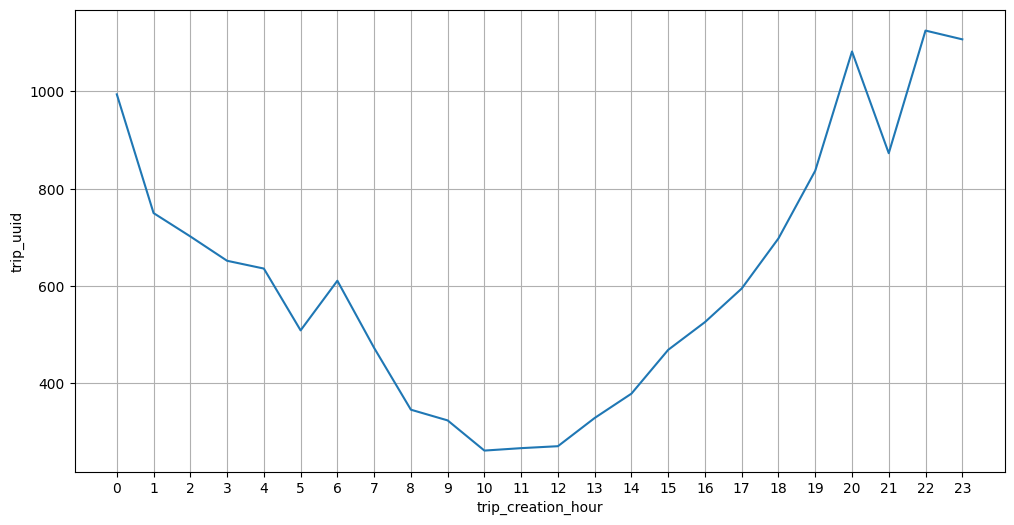

In [46]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour, 
             x = df_hour['trip_creation_hour'], 
             y = df_hour['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

* After 12pm noon number of trips starts increasing till 10 pm and then reduces and becomes least at 10 am

In [47]:
df_day = dh_df_trip.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


[]

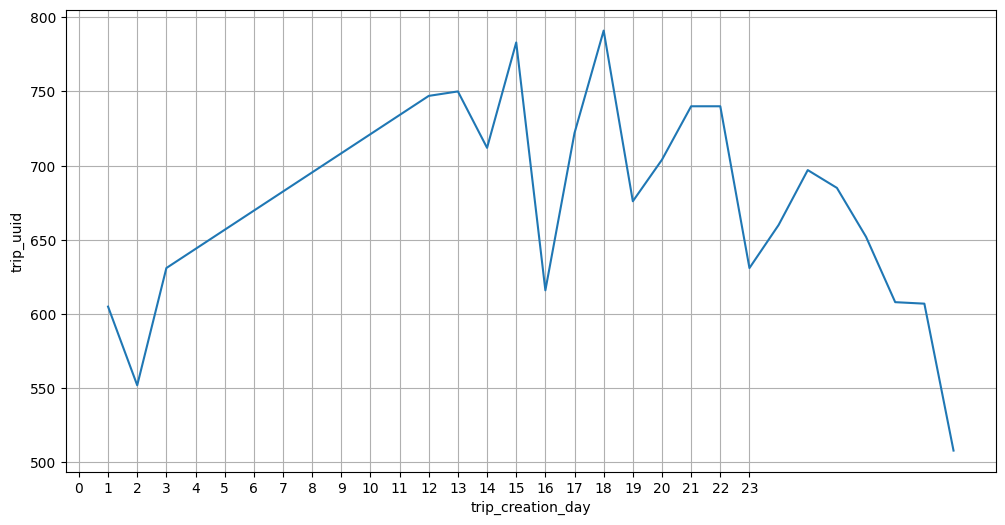

In [48]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_day, 
             x = df_day['trip_creation_day'], 
             y = df_day['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

* As we see there's a spike of orders in mid months, though ususually there's a dip on 16th 

In [49]:
dh_df_trip.columns

Index(['data', 'route_type', 'trip_creation_time', 'route_schedule_uuid',
       'trip_uuid', 'source_name', 'source_center', 'destination_name',
       'destination_center', 'od_time_diff_hour', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_cum_sum',
       'segment_osrm_time_cum_sum', 'segment_osrm_distance_cum_sum',
       'source_city', 'destination_city', 'source_state', 'destination_state',
       'trip_creation_week', 'trip_creation_year', 'trip_creation_hour',
       'trip_creation_day'],
      dtype='object')

In [51]:
#dh_df_trip_updated = dh_df_trip[["data","route_type","month","year","day","route_schedule_uuid","trip_uuid",'source_name', 'source_center', 'destination_name',
#       'destination_center','od_start_time','od_end_time']]

## Case 1:  Compare the difference between od_time_diff_hour and start_scan_to_end_scan
* od_time_diff_hour = od_start_time (Trip start time) - od_end_time (Trip end time)
* start_scan_to_end_scan – Time taken to deliver from source to destination and start_scan_to_end_scan. 
Do hypothesis testing/ Visual analysis to check.

### Visual analysis

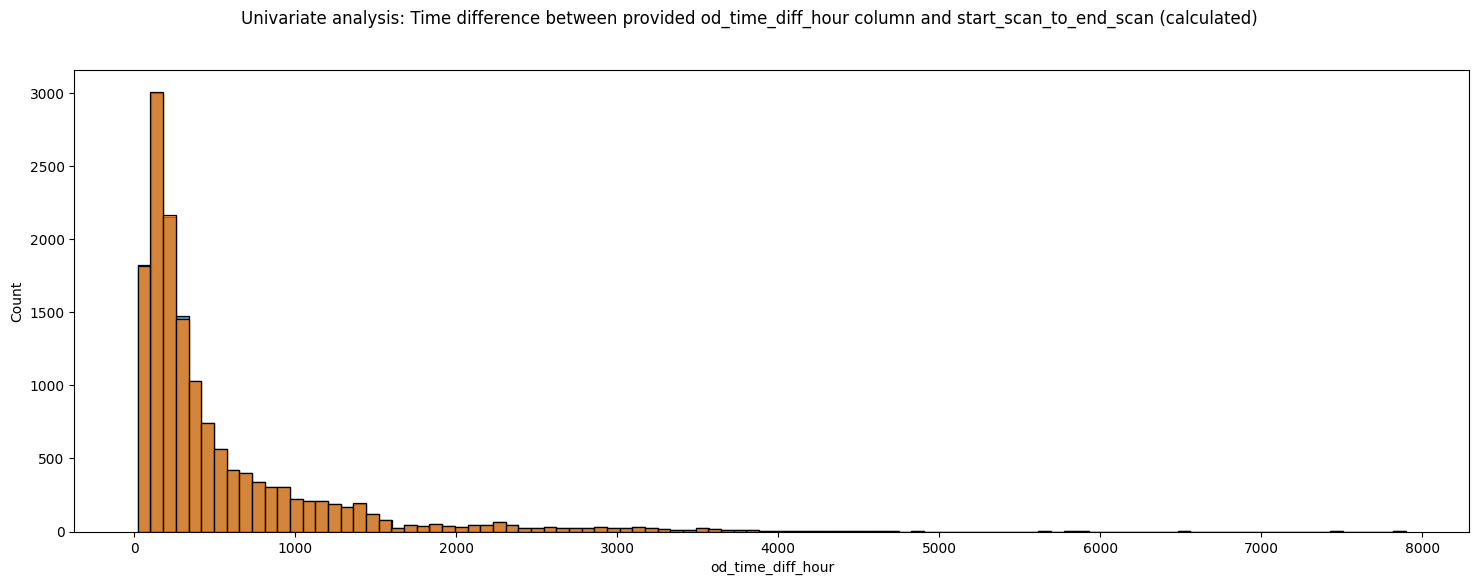

In [52]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: Time difference between provided od_time_diff_hour column and start_scan_to_end_scan (calculated)")


sns.histplot(x = "od_time_diff_hour",data=dh_df_trip, bins=100)
sns.histplot(x = "start_scan_to_end_scan",data=dh_df_trip, bins=100)
plt.show()


* Both the distributions look similar infact they overlap each other , let's Formulate a hypothesis and test it

* Let's check the distribution if normal using a qq-plot

qqplot normality check

[]

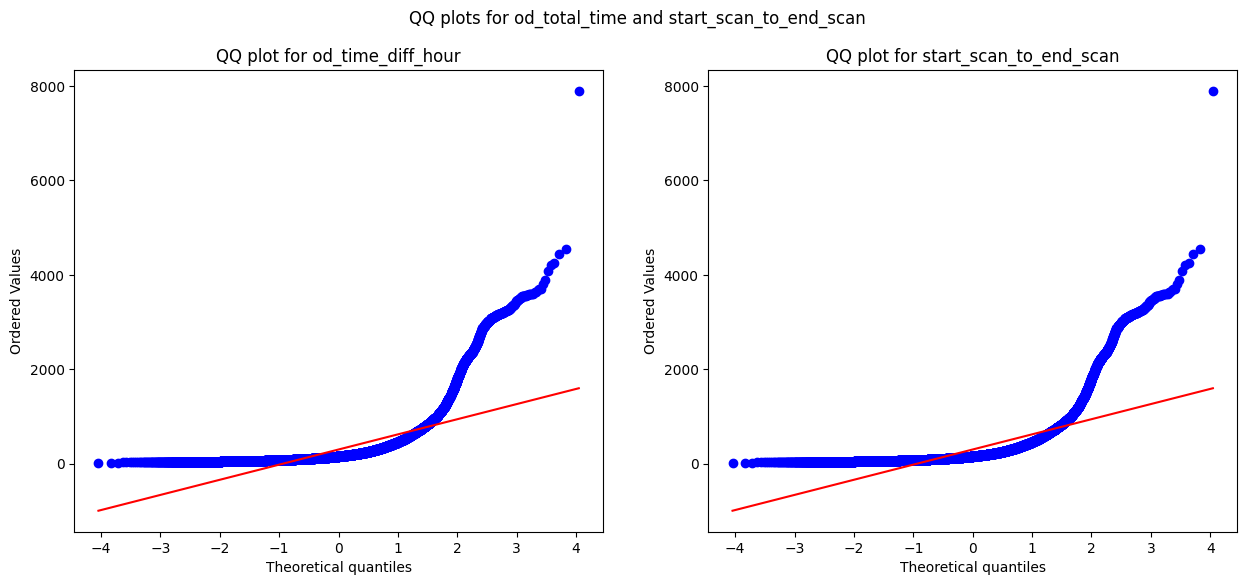

In [53]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(dh_df_g1['od_time_diff_hour'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_time_diff_hour')
plt.subplot(1, 2, 2)
spy.probplot(dh_df_g1['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

### It can be seen from the above plots that the samples do not come from normal distribution.
Transforming the data using boxcox transformation to check if the transformed data follows normal distribution using Shapiro test

In [54]:
transformed_od_total_time = spy.boxcox(dh_df_g1['od_time_diff_hour'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.559161265627176e-29
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "od_time_diff_hour" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.


In [55]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(dh_df_g1['od_time_diff_hour'], dh_df_g1['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.9998576726881699
The samples have Homogenous Variance 


The ks_2samp function is particularly useful when you want to compare two independent samples without assuming any specific distribution. It's a non-parametric test and does not make assumptions about the shape of the underlying distribution

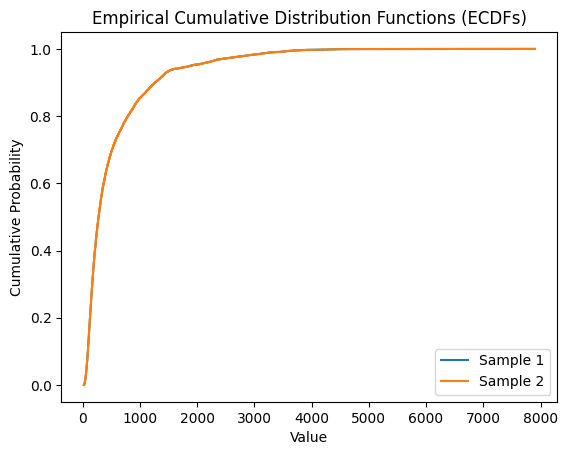

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Assuming "sample1" and "sample2" are your two samples
sample1 = dh_df_trip["od_time_diff_hour"]
sample2 = dh_df_trip["start_scan_to_end_scan"]

# Calculate ECDF for sample1
ecdf_sample1 = np.arange(1, len(sample1) + 1) / len(sample1)

# Calculate ECDF for sample2
ecdf_sample2 = np.arange(1, len(sample2) + 1) / len(sample2)

# Plot CDFs
plt.step(np.sort(sample1), ecdf_sample1, label='Sample 1')
plt.step(np.sort(sample2), ecdf_sample2, label='Sample 2')

plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend()
plt.show()


* Since CDF's seems to be exact;y similar we can use kS test, to check if these two samples have the same distribution

In [57]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
test_stat, p_value = ks_2samp(dh_df_g1['od_time_diff_hour'], dh_df_g1['start_scan_to_end_scan'])

print('KS Statistic:', test_stat)
print('P-value:', p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print('The samples are not from the same distribution')
else:
    print('The samples are from the same distribution')


KS Statistic: 0.006864381067961167
P-value: 0.5611100231737933
The samples are from the same distribution


### Since p-value > alpha therfore it can be concluded that od_time_diff_hour and start_scan_to_end_scan are similar

## CASE 2  | 'actual_time' and 'segment_osrm_time_cum_sum' Hypothesis testing

In [58]:
dh_df_trip[['actual_time', 'segment_osrm_time_cum_sum']].describe()

,actual_time,segment_osrm_time_cum_sum
count,14817.000000,14817.000000
mean,357.143754,180.949787
std,561.396157,314.542047
min,9.000000,6.000000
25%,67.000000,31.000000
50%,149.000000,65.000000
75%,370.000000,185.000000
max,6265.000000,2564.000000


* Let's check the distribution if normal using a qq-plot

[]

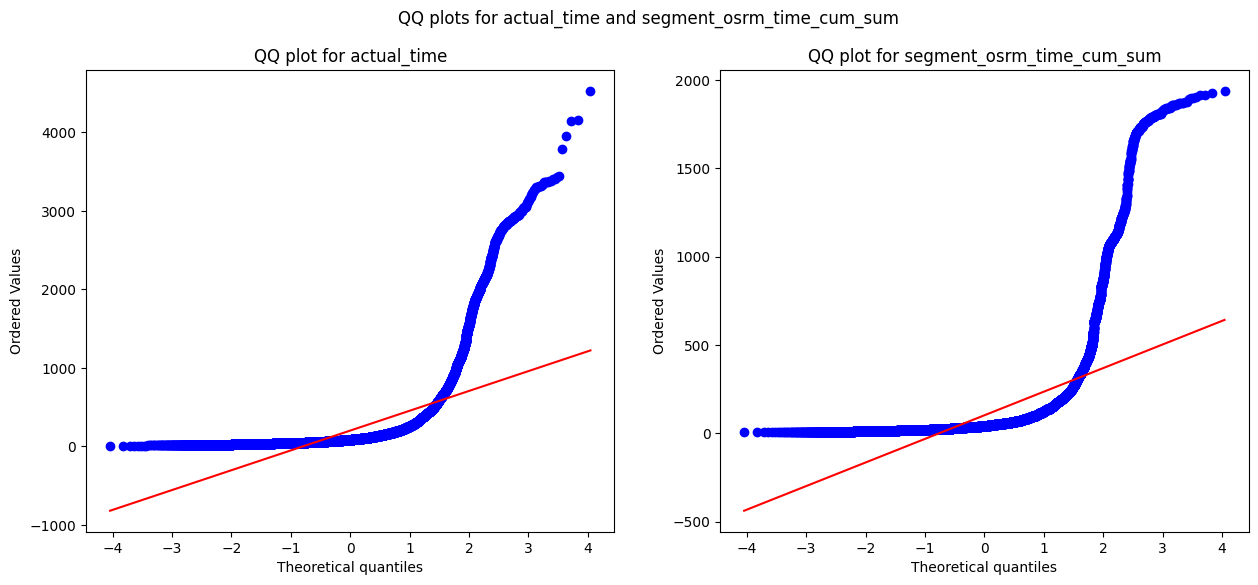

In [59]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_osrm_time_cum_sum')
spy.probplot(dh_df_g1['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(dh_df_g1['segment_osrm_time_cum_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time_cum_sum')
plt.plot()

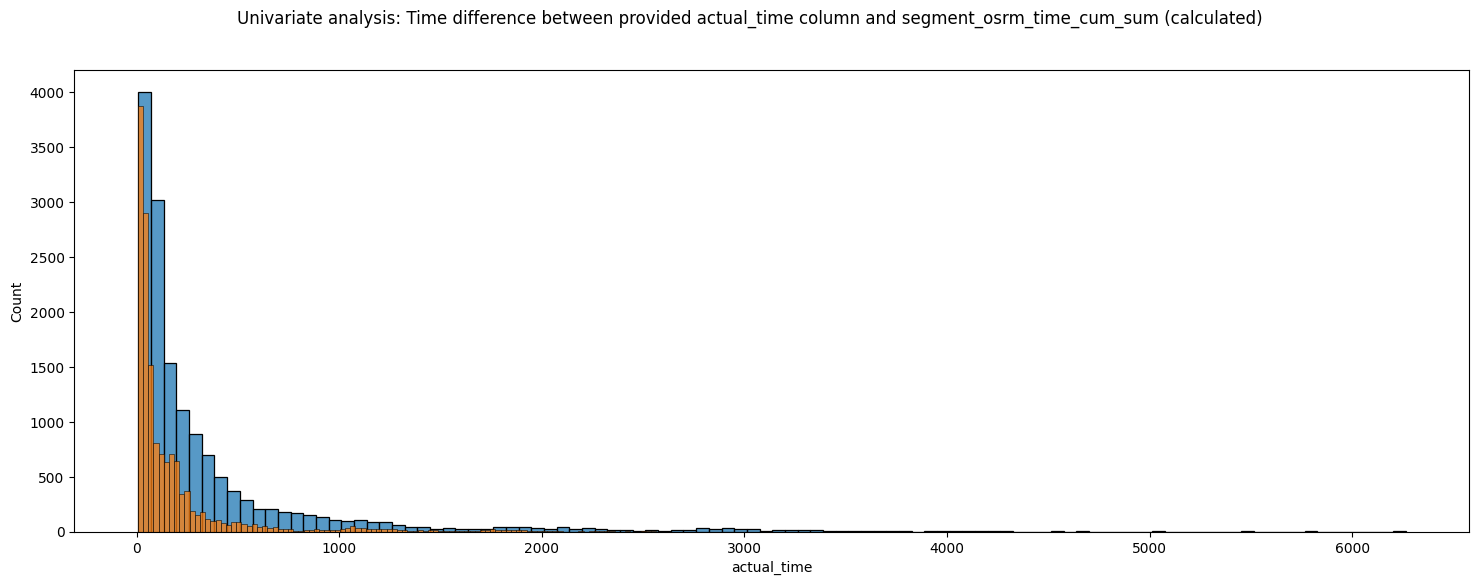

In [60]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: Time difference between provided actual_time column and segment_osrm_time_cum_sum (calculated)")


sns.histplot(x = "actual_time",data=dh_df_trip, bins=100)
sns.histplot(x = "segment_osrm_time_cum_sum",data=dh_df_trip, bins=100)
plt.show()

Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [61]:
transformed_od_total_time = spy.boxcox(dh_df_g1['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.436534251825331e-27
The sample does not follow normal distribution


In [62]:
transformed_od_total_time = spy.boxcox(dh_df_g1['segment_osrm_time_cum_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.7058482831236583e-23
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "segment_osrm_time_cum_sum" columns, the distributions do not follow normal distribution.

In [63]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(dh_df_g1['segment_osrm_time_cum_sum'], dh_df_g1['actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.612288768310992e-166
The samples do not have  Homogenous Variance


#### No assumption of T-test are satisfied

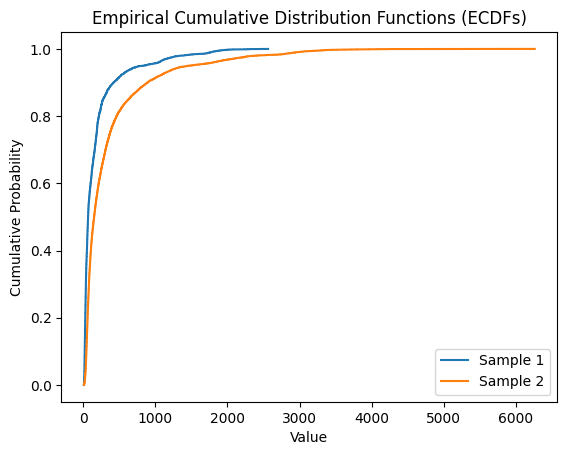

In [64]:


# Assuming "sample1" and "sample2" are your two samples
sample1 = dh_df_trip["segment_osrm_time_cum_sum"]
sample2 = dh_df_trip["actual_time"]

# Calculate ECDF for sample1
ecdf_sample1 = np.arange(1, len(sample1) + 1) / len(sample1)

# Calculate ECDF for sample2
ecdf_sample2 = np.arange(1, len(sample2) + 1) / len(sample2)

# Plot CDFs
plt.step(np.sort(sample1), ecdf_sample1, label='Sample 1')
plt.step(np.sort(sample2), ecdf_sample2, label='Sample 2')

plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend()
plt.show()


In [65]:
from scipy.stats import ks_2samp

# Assuming sample1 and sample2 are your two samples
statistic, p_value = ks_2samp(sample1, sample2)

print('KS Statistic:', statistic)
print('P-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('The distributions are different')
else:
    print('The distributions are similar')


KS Statistic: 0.26449348721063637
P-value: 0.0
The distributions are different


### It can be derived that both segment_osrm_time_cum_sum and actual time are statistically not similar 

## CASE 3 | 'osrm_distance' and 'segment_osrm_distance_cum_sum' Hypothesis testing

In [66]:
dh_df_trip[['osrm_distance', 'segment_osrm_distance_cum_sum']].describe()

,osrm_distance,segment_osrm_distance_cum_sum
count,14817.000000,14817.000000
mean,204.344689,223.201161
std,370.395573,416.628374
min,9.072900,9.072900
25%,30.819200,32.654500
50%,65.618800,70.154400
75%,208.475000,218.802400
max,2840.081000,3523.632400


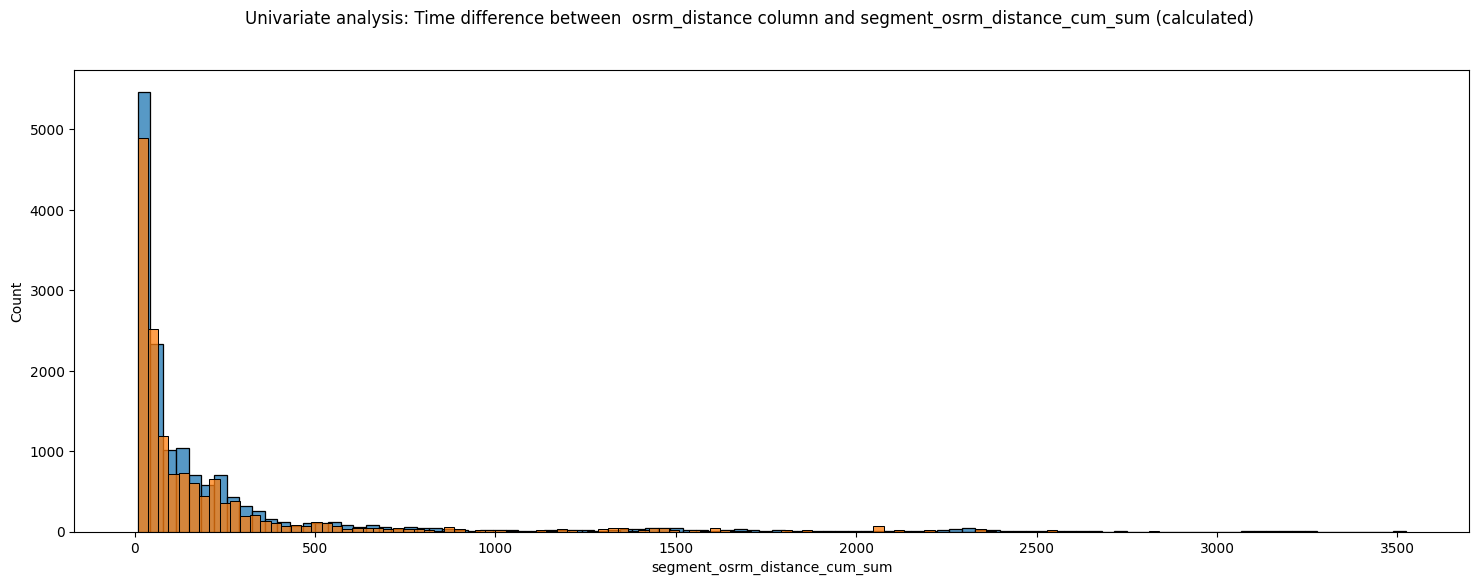

In [67]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: Time difference between  osrm_distance column and segment_osrm_distance_cum_sum (calculated)")


sns.histplot(x = "segment_osrm_distance_cum_sum",data=dh_df_trip, bins=100)
sns.histplot(x = "osrm_distance",data=dh_df_trip, bins=100)
plt.show()

The visual plot looks slightly different, let's see it's qq plot for normality

* Let's check the distribution if normal using a qq-plot

[]

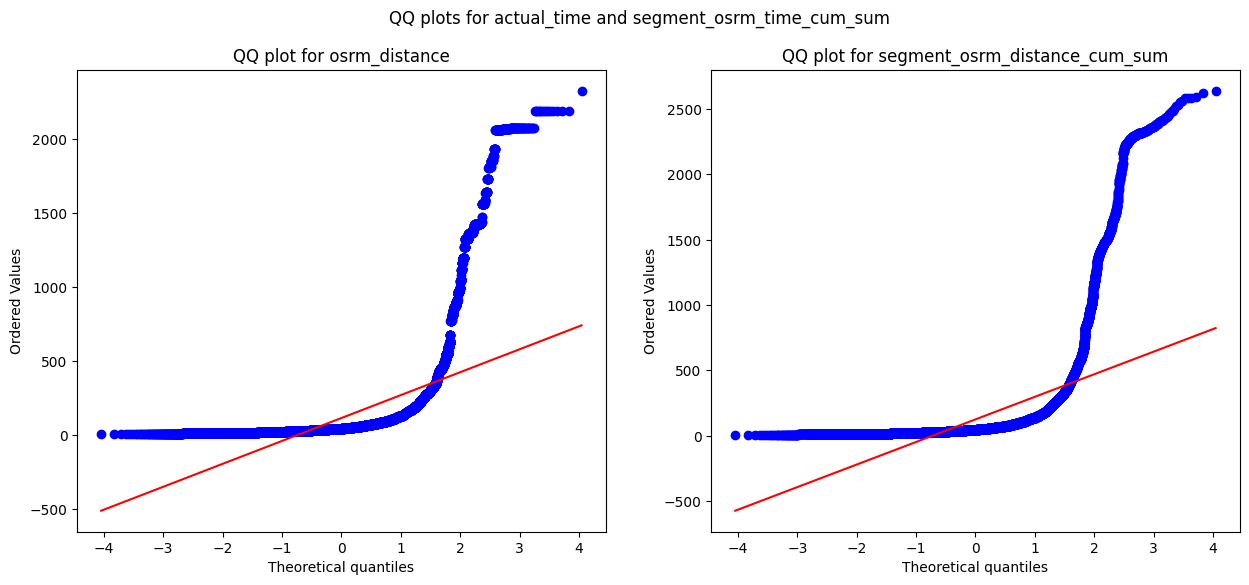

In [68]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_osrm_time_cum_sum')
spy.probplot(dh_df_g1['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(dh_df_g1['segment_osrm_distance_cum_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance_cum_sum')
plt.plot()

Let's box cox transform both columns and see if normality induces

In [69]:
transformed_osrm_distance = spy.boxcox(dh_df_g1['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 6.247986369784407e-29
The sample does not follow normal distribution


In [70]:
transformed_osrm_distance = spy.boxcox(dh_df_g1['segment_osrm_distance_cum_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 5.09625811484648e-28
The sample does not follow normal distribution


In [71]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(dh_df_g1['segment_osrm_distance_cum_sum'], dh_df_g1['osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 3.006836723844613e-05
The samples do not have  Homogenous Variance


#### No assumption of T-test are satisfied, Let's plot CDF's and see

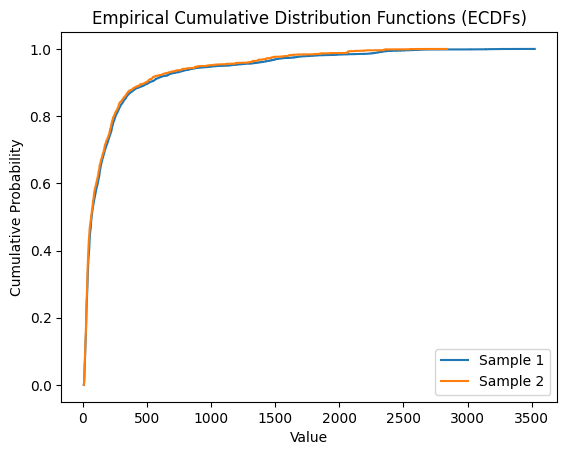

In [72]:


# Assuming "sample1" and "sample2" are your two samples
sample1 = dh_df_trip["segment_osrm_distance_cum_sum"]
sample2 = dh_df_trip["osrm_distance"]

# Calculate ECDF for sample1
ecdf_sample1 = np.arange(1, len(sample1) + 1) / len(sample1)

# Calculate ECDF for sample2
ecdf_sample2 = np.arange(1, len(sample2) + 1) / len(sample2)

# Plot CDFs
plt.step(np.sort(sample1), ecdf_sample1, label='Sample 1')
plt.step(np.sort(sample2), ecdf_sample2, label='Sample 2')

plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend()
plt.show()


The CDF's appear to be similar, let's see if they belong to the same distribution

In [73]:
from scipy.stats import ks_2samp

# Assuming sample1 and sample2 are your two samples
statistic, p_value = ks_2samp(sample1, sample2)

print('KS Statistic:', statistic)
print('P-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('The distributions are different')
else:
    print('The distributions are similar')


KS Statistic: 0.0416413578997098
P-value: 1.3413627761631081e-11
The distributions are different


### Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance_cum_sum are not similar.

## CASE 4  | 'osrm_time' and 'segment_osrm_time_cum_sum' Hypothesis testing

In [74]:
dh_df_trip[['osrm_time', 'segment_osrm_time_cum_sum']].describe()

,osrm_time,segment_osrm_time_cum_sum
count,14817.000000,14817.000000
mean,161.384018,180.949787
std,271.360995,314.542047
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


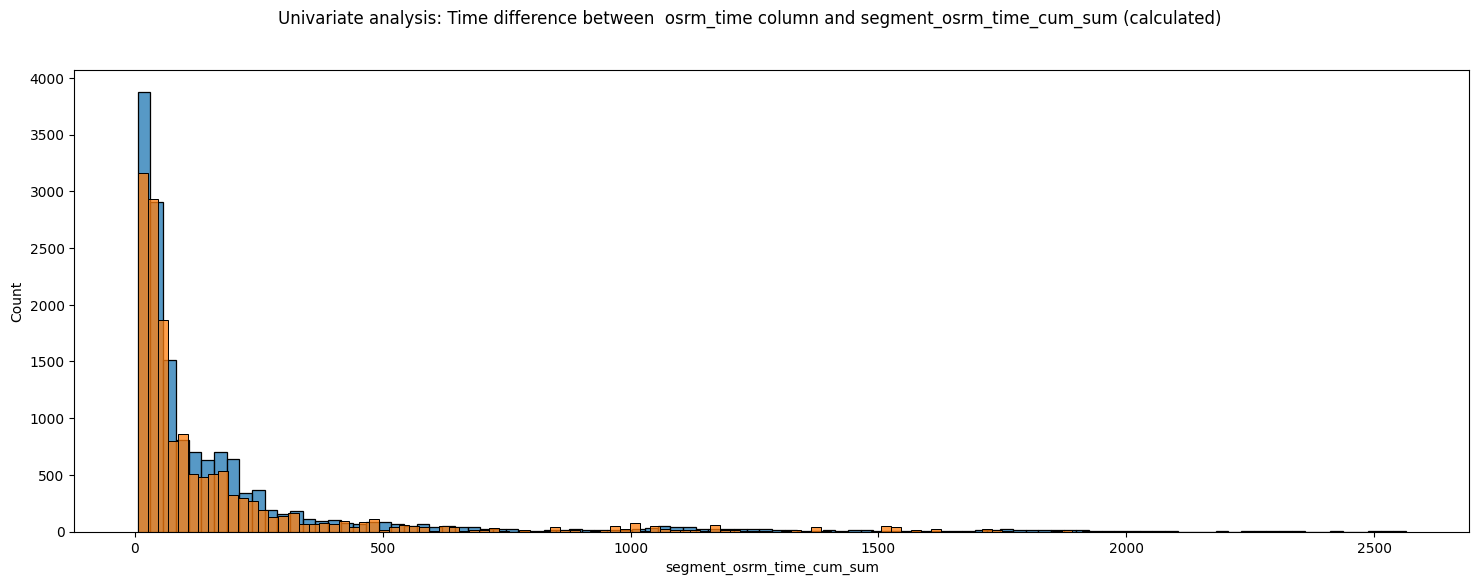

In [75]:
fig= plt.figure(figsize=(18,6))
fig.suptitle("Univariate analysis: Time difference between  osrm_time column and segment_osrm_time_cum_sum (calculated)")


sns.histplot(x = "segment_osrm_time_cum_sum",data=dh_df_trip, bins=100)
sns.histplot(x = "osrm_time",data=dh_df_trip, bins=100)
plt.show()

### Distribution seems different, let's check normality

[]

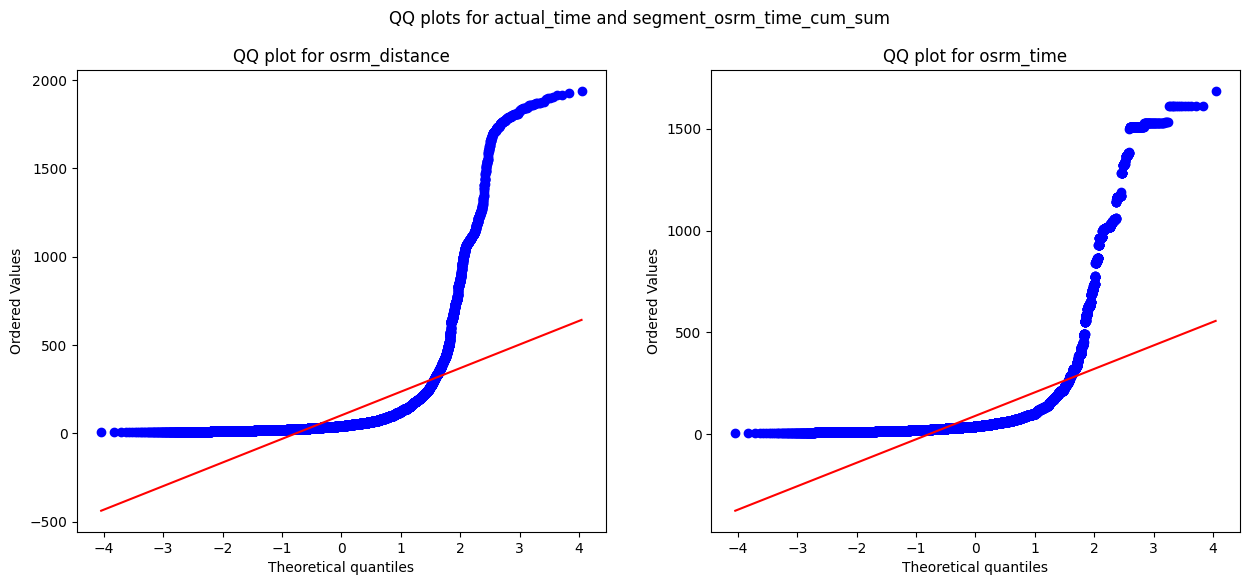

In [76]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_osrm_time_cum_sum')
spy.probplot(dh_df_g1['segment_osrm_time_cum_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(dh_df_g1['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

In [77]:
transformed_osrm_distance = spy.boxcox(dh_df_g1['segment_osrm_time_cum_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.7058482831236583e-23
The sample does not follow normal distribution


In [78]:
transformed_osrm_distance = spy.boxcox(dh_df_g1['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.3978317836354236e-24
The sample does not follow normal distribution


In [79]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(dh_df_g1['osrm_time'], dh_df_g1['segment_osrm_time_cum_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.3076306185953785e-09
The samples do not have  Homogenous Variance


#### No assumption of T-test are satisfied, Let's plot CDF's and see

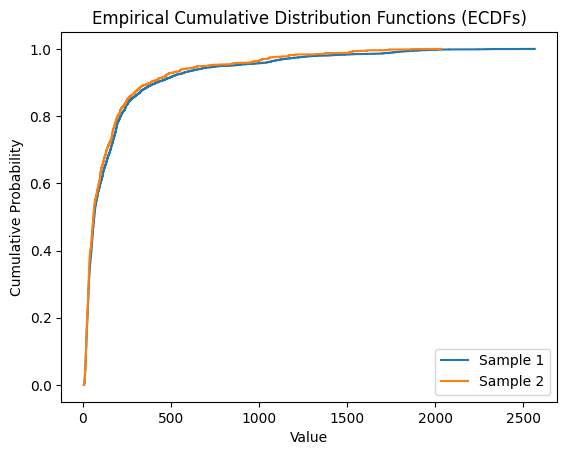

In [80]:


# Assuming "sample1" and "sample2" are your two samples
sample1 = dh_df_trip["segment_osrm_time_cum_sum"]
sample2 = dh_df_trip["osrm_time"]

# Calculate ECDF for sample1
ecdf_sample1 = np.arange(1, len(sample1) + 1) / len(sample1)

# Calculate ECDF for sample2
ecdf_sample2 = np.arange(1, len(sample2) + 1) / len(sample2)

# Plot CDFs
plt.step(np.sort(sample1), ecdf_sample1, label='Sample 1')
plt.step(np.sort(sample2), ecdf_sample2, label='Sample 2')

plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend()
plt.show()


In [81]:
from scipy.stats import ks_2samp

# Assuming sample1 and sample2 are your two samples
statistic, p_value = ks_2samp(sample1, sample2)

print('KS Statistic:', statistic)
print('P-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('The distributions are different')
else:
    print('The distributions are similar')

KS Statistic: 0.0363096443274617
P-value: 6.383943701595088e-09
The distributions are different


### Since p-value < alpha therfore it can be concluded that segment_osrm_time_cum_sum and osrm_time are not similar.

## Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [82]:
print(f'Total number of numeric columns in the data : {len(dh_df_g1.describe().columns)}')
print("All numeric columns")
print(list(dh_df_g1.describe().columns))

print("Filtered numeric columns: ")

num_cols = [ 'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_cum_sum', 'segment_osrm_time_cum_sum', 'segment_osrm_distance_cum_sum', 'od_time_diff_hour']
num_cols

Total number of numeric columns in the data : 19
All numeric columns
['index', 'trip_creation_time', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_cum_sum', 'segment_osrm_time_cum_sum', 'segment_osrm_distance_cum_sum', 'od_time_diff_hour', 'trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']
Filtered numeric columns: 


['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_cum_sum',
 'segment_osrm_time_cum_sum',
 'segment_osrm_distance_cum_sum',
 'od_time_diff_hour']

In [83]:
dh_df_g1.describe()

,index,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cum_sum,segment_osrm_time_cum_sum,segment_osrm_distance_cum_sum,od_time_diff_hour,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
count,26368.000000,26368,26368,26368,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.0,26368.000000,26368.000000,26368.000000,26368.0,26368.000000
mean,13183.500000,2018-09-22 14:43:36.654210304,2018-09-22 18:35:33.012112384,2018-09-22 23:34:19.660814336,298.278671,92.425217,200.690193,90.686704,114.827642,198.863092,101.681318,125.423680,298.777478,2018.0,9.121701,12.874772,18.405036,38.307721,2.902002
min,0.000000,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,20.702813,2018.0,9.000000,0.000000,1.000000,37.0,0.000000
25%,6591.750000,2018-09-17 04:43:09.467353088,2018-09-17 08:36:26.495753472,2018-09-17 16:27:20.898079744,91.000000,21.684419,51.000000,25.000000,27.764725,50.000000,25.000000,28.471300,91.034908,2018.0,9.000000,4.000000,14.000000,38.0,1.000000
50%,13183.500000,2018-09-22 04:42:33.886023424,2018-09-22 08:33:44.414494720,2018-09-22 16:37:58.917223936,152.000000,35.114228,84.000000,39.000000,43.633050,83.000000,42.000000,45.944400,152.518472,2018.0,9.000000,16.000000,19.000000,38.0,3.000000
75%,19775.250000,2018-09-27 20:22:47.618743808,2018-09-28 00:13:59.749550848,2018-09-28 03:42:07.161700864,307.000000,65.750726,168.000000,72.000000,85.566975,166.000000,79.000000,91.351975,307.099104,2018.0,9.000000,21.000000,25.000000,39.0,5.000000
max,26367.000000,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,1938.000000,2640.924700,7898.551955,2018.0,10.000000,23.000000,30.000000,40.0,6.000000
std,7611.930285,NaN,NaN,NaN,440.561588,209.415035,384.853640,185.080423,253.773765,381.283224,215.650948,285.932556,440.561220,0.0,0.326946,8.268282,7.913996,0.966483,1.921969


## Visualizing outliers

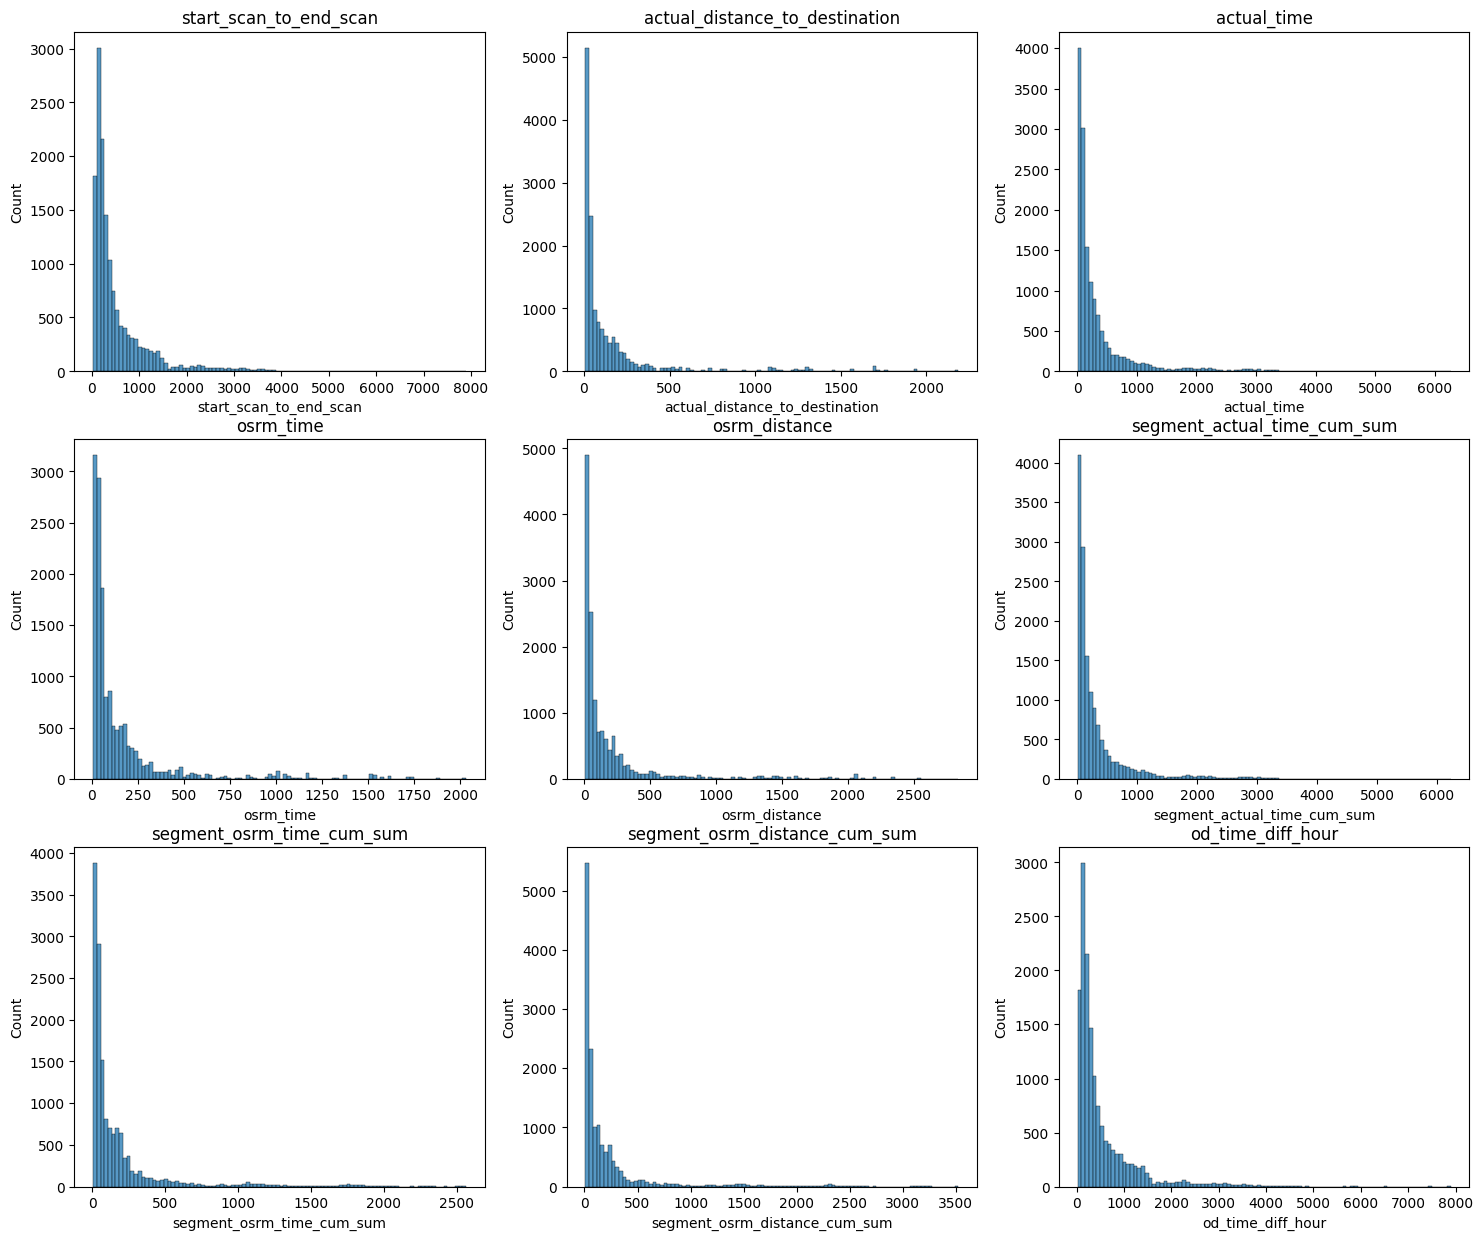

In [84]:
plt.figure(figsize = (18,15))
for i in range(0,len(num_cols)):
    plt.subplot(3, 3, i+1)
    plt.title(num_cols[i])
    sns.histplot(x = num_cols[i],data=dh_df_trip, bins=100)



* Whole data is right skewed indicating a possibility of outliers

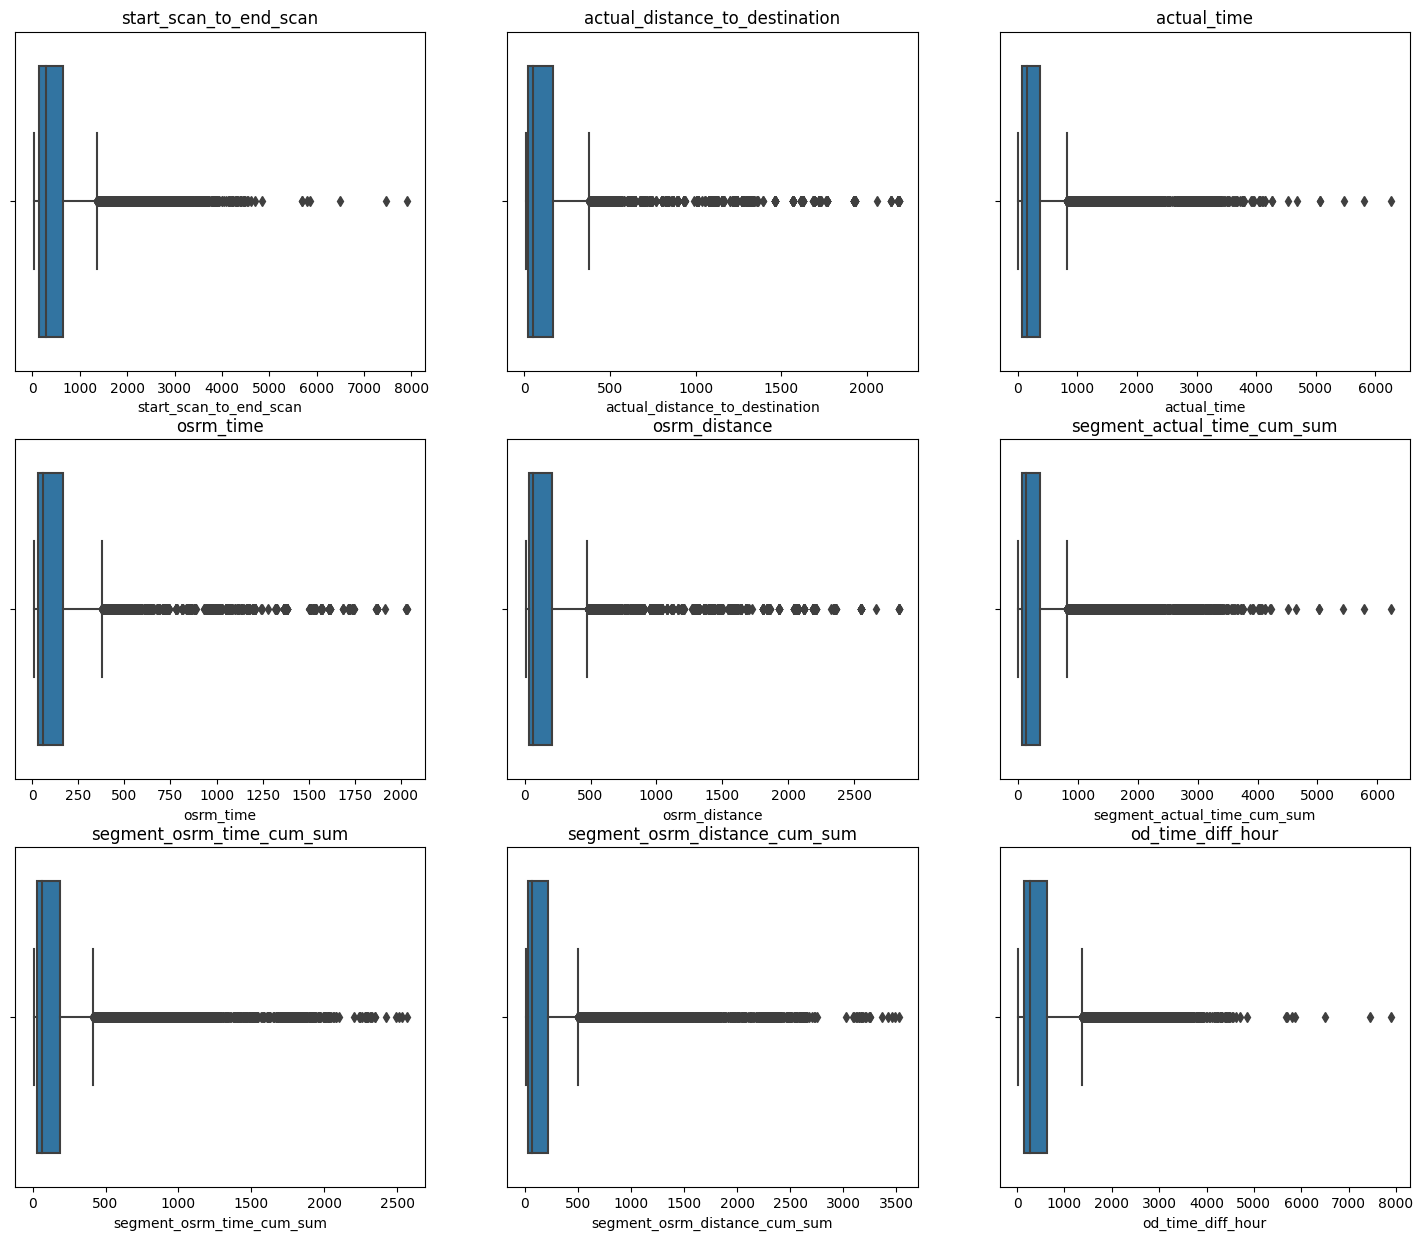

In [85]:
plt.figure(figsize = (18,15))
for i in range(0,len(num_cols)):
    plt.subplot(3, 3, i+1)
    plt.title(num_cols[i])
    sns.boxplot(x = num_cols[i],data=dh_df_trip)



### Since we can see there are clearly some outliers that need to be treated

In [86]:
for i in num_cols:
    print(f"Column {i}")
    Q_1 = np.quantile(dh_df_g1[i],0.25)
    Q_3 = np.quantile(dh_df_g1[i],0.75)
    IQR = Q_3 - Q_1
    lower = Q_1 - 1.5 * IQR
    upper =  Q_3 + 1.5 * IQR
    print(f"Q1: {Q_1}")
    print(f"Q3: {Q_3}")
    print(f"IQR: {IQR}")
    outliers = dh_df_g1.loc[(dh_df_g1[i]>upper) | (dh_df_g1[i]<lower )]
    print(f"Number of outliers {outliers.shape[0]}")
    print("-----------------------------")
    #print(f"Ranges withing IQR: {}")


Column start_scan_to_end_scan
Q1: 91.0
Q3: 307.0
IQR: 216.0
Number of outliers 2721
-----------------------------
Column actual_distance_to_destination
Q1: 21.684418968077466
Q3: 65.75072642140785
IQR: 44.06630745333038
Number of outliers 3292
-----------------------------
Column actual_time
Q1: 51.0
Q3: 168.0
IQR: 117.0
Number of outliers 3152
-----------------------------
Column osrm_time
Q1: 25.0
Q3: 72.0
IQR: 47.0
Number of outliers 2919
-----------------------------
Column osrm_distance
Q1: 27.764725000000002
Q3: 85.56697500000001
IQR: 57.802250000000015
Number of outliers 3098
-----------------------------
Column segment_actual_time_cum_sum
Q1: 50.0
Q3: 166.0
IQR: 116.0
Number of outliers 3155
-----------------------------
Column segment_osrm_time_cum_sum
Q1: 25.0
Q3: 79.0
IQR: 54.0
Number of outliers 3153
-----------------------------
Column segment_osrm_distance_cum_sum
Q1: 28.4713
Q3: 91.351975
IQR: 62.880675
Number of outliers 3106
-----------------------------
Column od_time

* Depending on the usecase and anlysis we can decide on removing or keeping the outliers on discussion with the domain experts. For now the above values fall outside IQR

In [87]:
# Get value counts before one-hot encoding

dh_df_g1['route_type'].value_counts()

route_type
FTL        13939
Carting    12429
Name: count, dtype: int64

In [90]:

label_encoder = LabelEncoder()
dh_df_g1['route_type'] = label_encoder.fit_transform(dh_df_g1['route_type'])
dh_df_g1['route_type']

dh_df_g1['data'] = label_encoder.fit_transform(dh_df_g1['data'])
dh_df_g1['data']

0        1
1        1
2        1
3        1
4        1
        ..
26363    0
26364    0
26365    0
26366    0
26367    0
Name: data, Length: 26368, dtype: int64

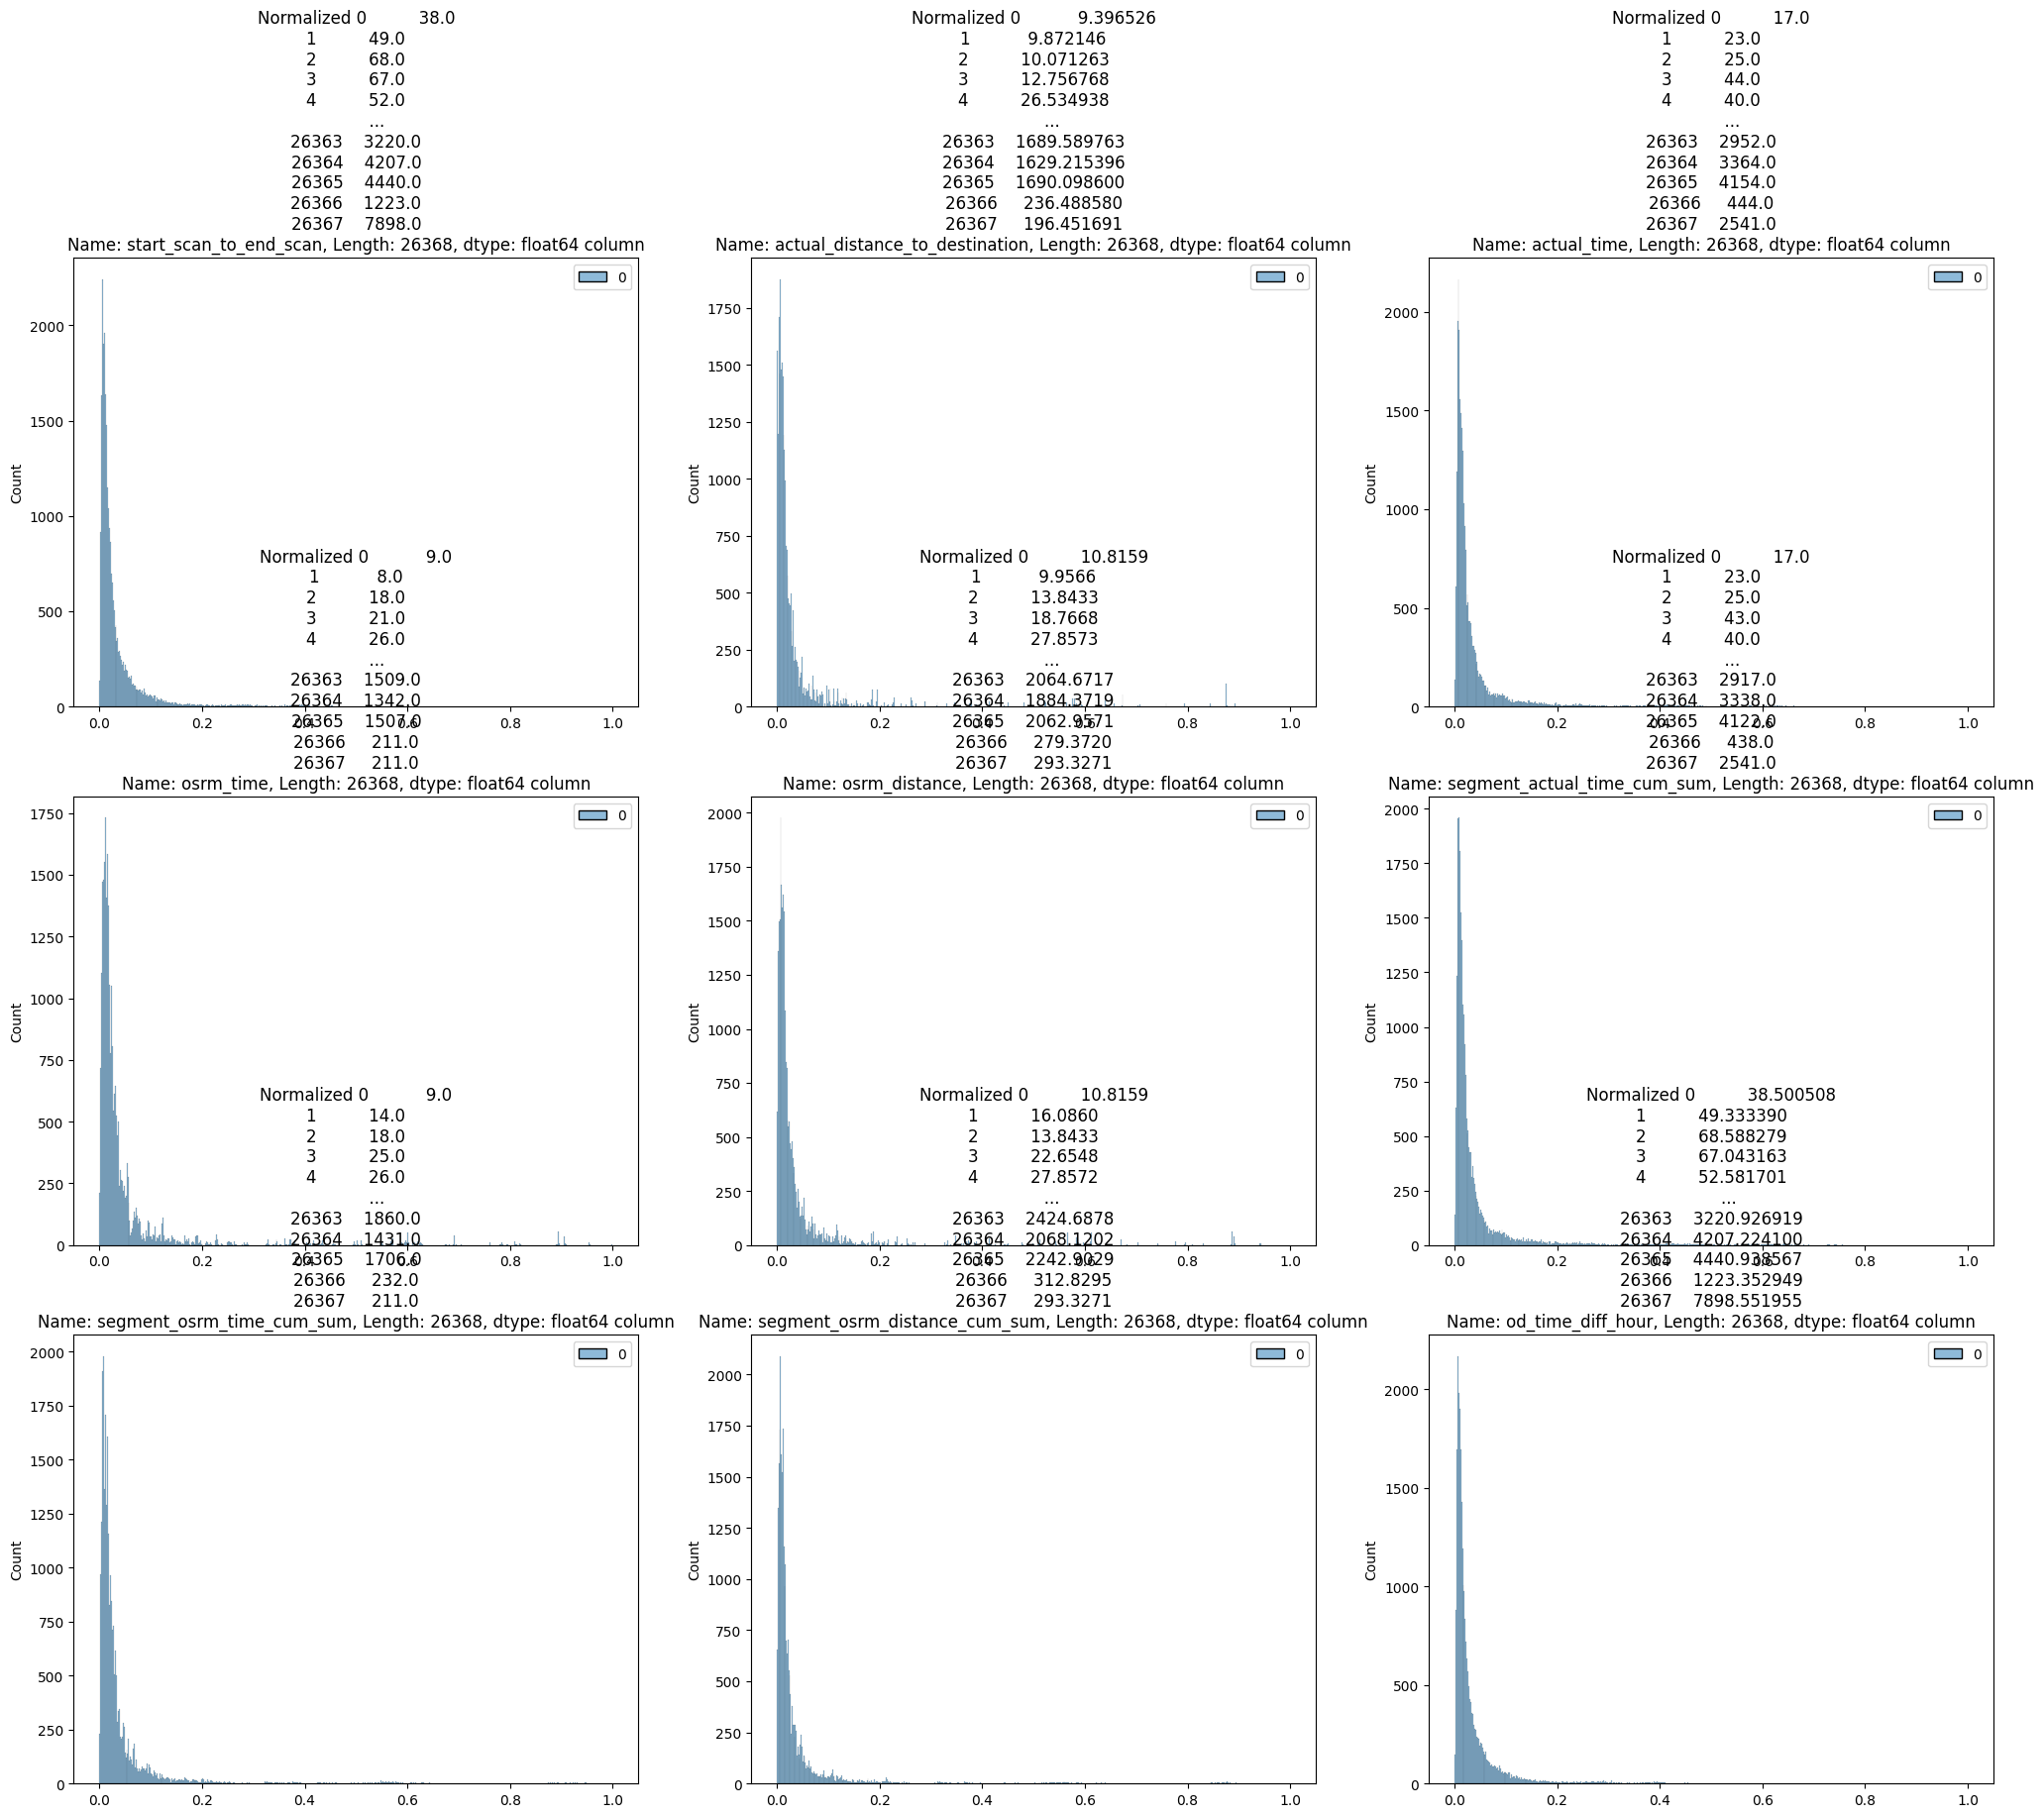

In [173]:
plt.figure(figsize = (25,20))
for i in range(0,len(num_cols)):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(dh_df_g1[num_cols[i]].to_numpy().reshape(-1, 1))
    plt.subplot(3, 3, i+1)
    sns.histplot(scaled)
    plt.title(f"Normalized {dh_df_g1[num_cols[i]]} column")


In [188]:
print("Trip start time: ")
print(f"{dh_df_g1['trip_month'].min()} {dh_df_g1['trip_year'].min()}")
print("Trip end time: ")
print(f"{dh_df_g1['trip_month'].max()} {dh_df_g1['trip_year'].max()}")

Trip start time: 
9 2018
Trip end time: 
10 2018


In [192]:
dh_df_g1.columns

Index(['index', 'trip_segment_id', 'data', 'route_type', 'trip_creation_time',
       'route_schedule_uuid', 'trip_uuid', 'source_name', 'source_center',
       'destination_name', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_cum_sum',
       'segment_osrm_time_cum_sum', 'segment_osrm_distance_cum_sum',
       'od_time_diff_hour', 'trip_year', 'trip_month', 'trip_hour', 'trip_day',
       'trip_week', 'trip_dayofweek'],
      dtype='object')

In [203]:
dh_df_g1['trip_uuid'].nunique()
print(f"Source city count {df_source_city['source_city'].nunique()}")
print(f"Destination city count {df_destination_city['destination_city'].nunique()}")
print(f"Source state count {df_source_state['source_state'].nunique()}")
print(f"Destination state count {df_destination_state['destination_state'].nunique()}")


dh_df_g1["source_center"].nunique()


dh_df_g1["destination_center"].nunique()

Source city count 10
Destination city count 10
Source state count 29
Destination state count 32


1481

## General Insights

* The data we have has a timeline of 9/18 to 10/18
* The total number of trips registered are 14817, City count 10, state count 29, 1508 unique source centers, 1481 unique destination centers
* There's a spike of orders in mid year months
* After 12pm noon number of trips starts increasing till 10 pm and then reduces and becomes least at 10 am
* Maximum orders ended up in Mumbai, Bengaluru, Gurgaon, Hyderabad. Most orders being placed from these city
* Maximum orders originated in Mumbai, Bengaluru, Gurgaon, Bhiwandi. That means that the seller base is strong in these cities.
* segment_osrm_time_cum_sum and actual time are statistically not similar 
* od_time_diff_hour and start_scan_to_end_scan are staistically similar
* osrm_distance and segment_osrm_distance_cum_sum are not similar.
* segment_osrm_time_cum_sum and osrm_time are not similar.

## Busineess recommandtions
* spike in orders during mid-year months, consider investigating the factors that contributed to this surge. It could be influenced by seasonality, promotions, or other external factors. Understanding the reasons behind this spike can help in planning future marketing strategies or promotions during similar periods.
* number of trips increases from 12 pm noon until 10 pm, Ensure that staffing, vehicle availability, and operational efficiency are maximized during these times to meet increased demand.
* Focus on cities like Mumbai, Bengaluru, Gurgaon, Hyderabad for marketing efforts, promotions, and partnerships. Since these cities have both a high number of orders placed and a strong seller base, investing in these locations can yield better returns.
Building partnerships, offering incentives, and providing support to sellers in these regions can help expand and enhance your seller network.
* od_time_diff_hour and start_scan_to_end_scan are pretty accurate, 
* osrm_distance , segment_osrm_time_cum_sum needs to be optimized, identify why and where the time is adding up or complete.
* osrm_distance and segment_osrm_distance_cum_sum. Understanding these differences can help in optimizing route planning, which can lead to cost savings and improved delivery efficiency.
* Explore opportunities for expanding operations to additional cities or regions based on the analysis of customer demand and seller concentration.
